# Disease Prediction

## Importing libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
from sklearn.metrics import r2_score,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation

import pylab
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading Train Dataset

In [6]:
train_set = pd.read_csv('Training.csv')
test_set = pd.read_csv('Testing.csv')
train_set = train_set.iloc[:,:-1]
train_set.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


### Shape of training set

In [7]:
nRow,nCol=train_set.shape
print(f'There are {nRow} rows and {nCol} columns. Prognosis is the target/label variable.')

There are 4920 rows and 133 columns. Prognosis is the target/label variable.


### Output Variable: Prognosis

In [8]:
train_set['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [9]:
print(f'**Summary**:\n There are 41 diseases in the dataset and each containing 120 rows. So, the dataset is equally balanced.')

**Summary**:
 There are 41 diseases in the dataset and each containing 120 rows. So, the dataset is equally balanced.


## Data Pre-processing

### Checking Missing data points

In [10]:
train_set.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [11]:
test_set.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [12]:
symtom_dict = {}
for index,column in enumerate(train_set.columns):
    symtom_dict[column] = index
    


train_set['prognosis'].replace(
    {}, inplace=True)

In [13]:
train_set['prognosis']

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

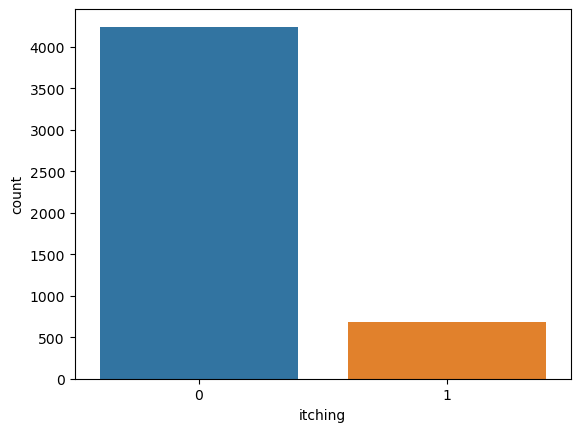

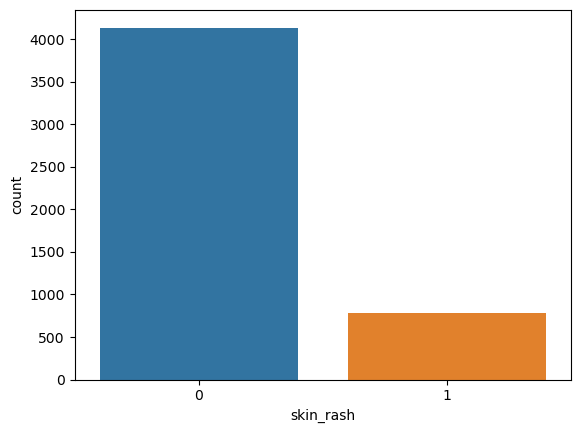

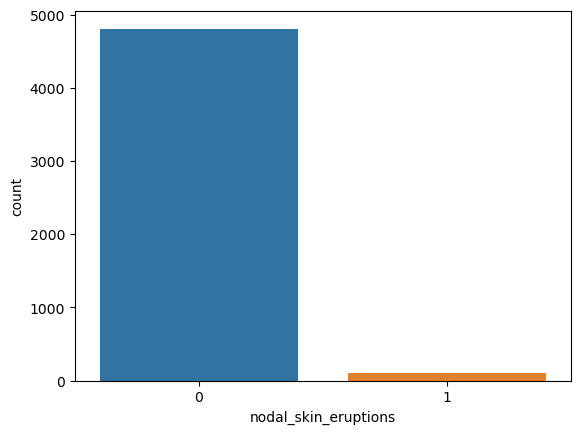

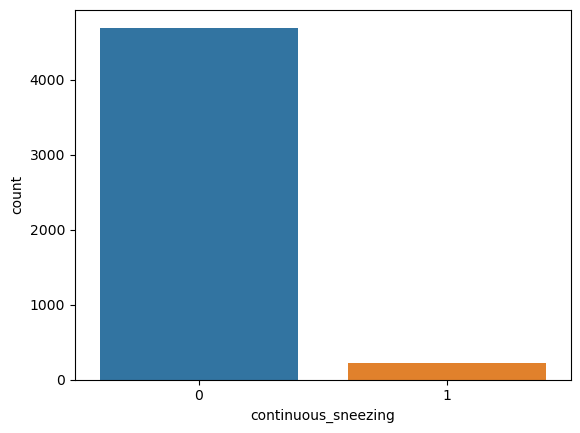

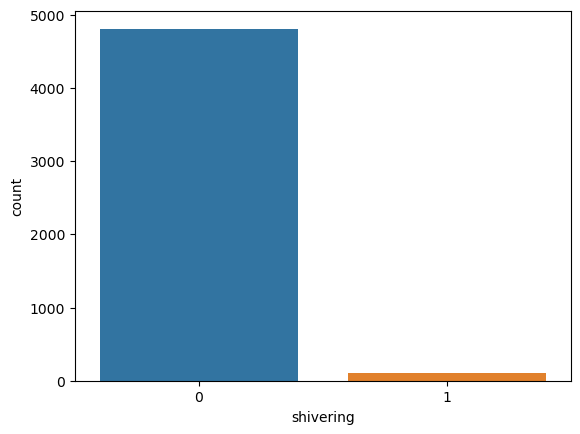

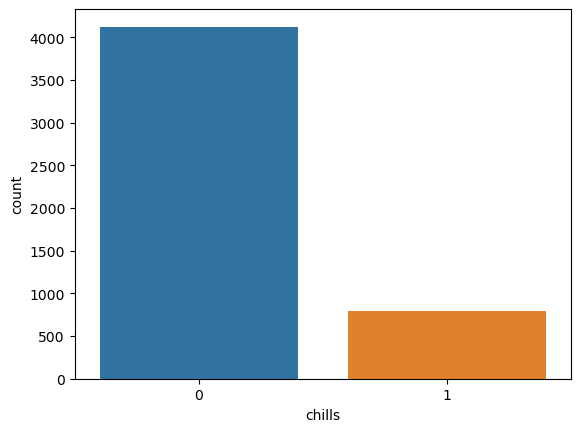

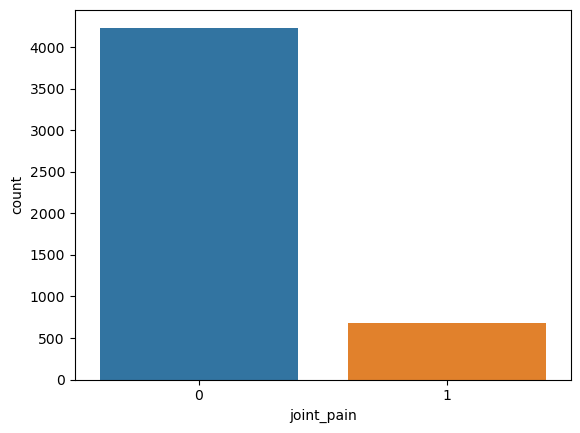

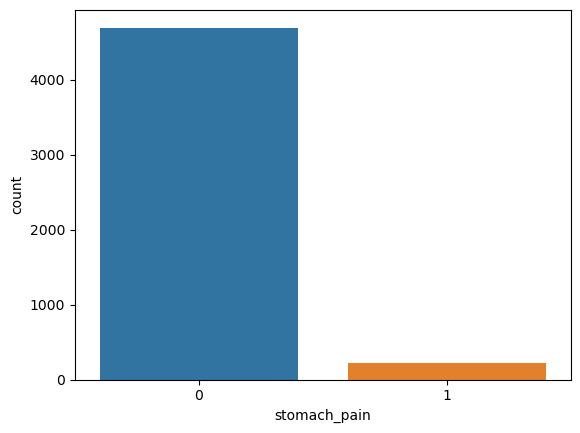

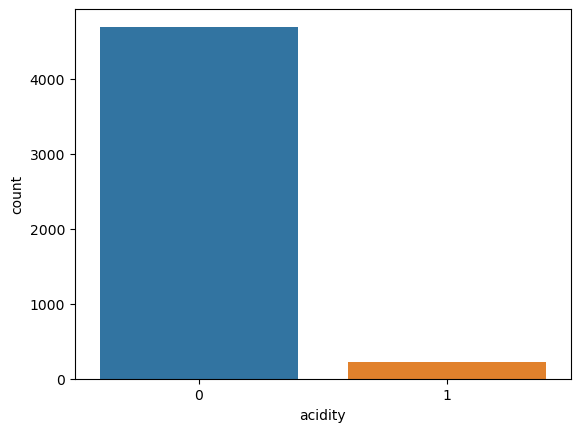

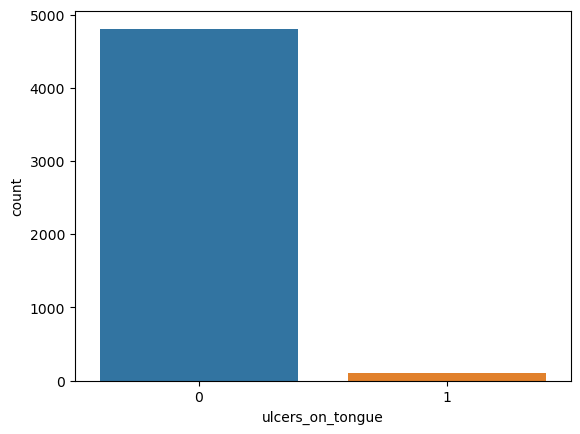

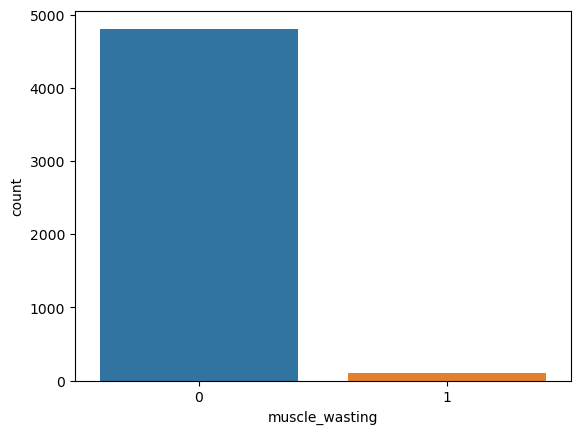

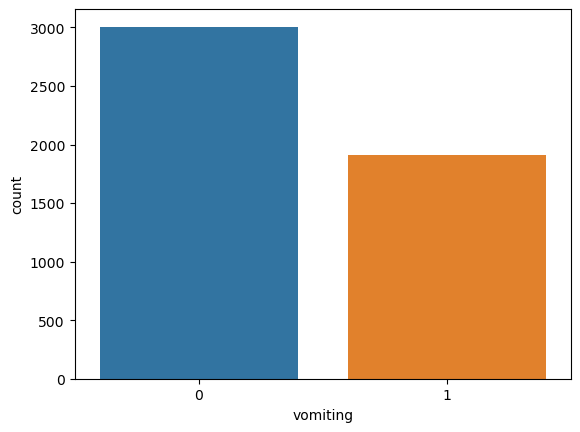

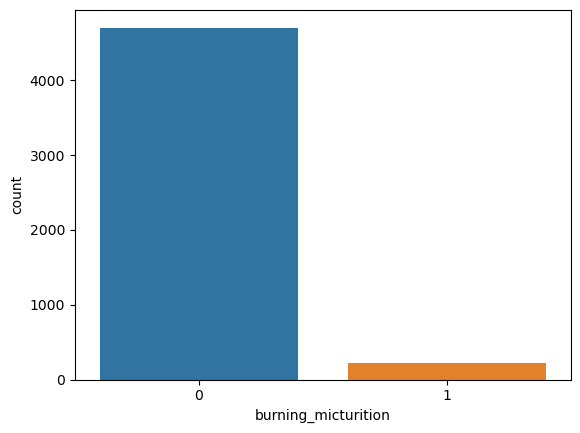

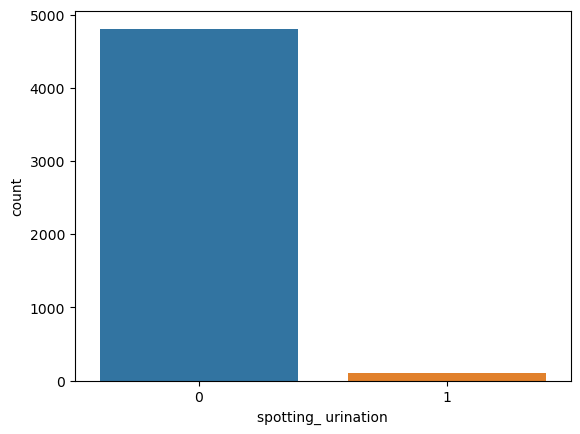

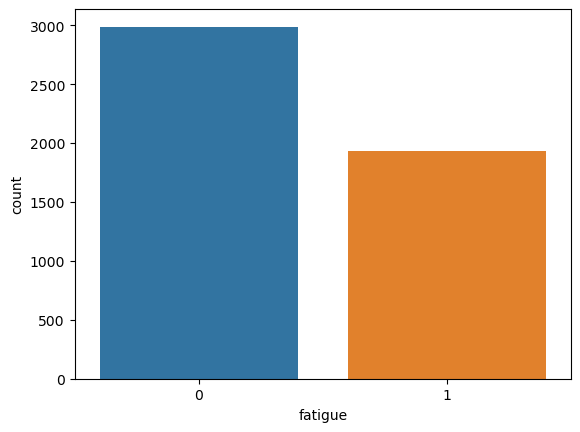

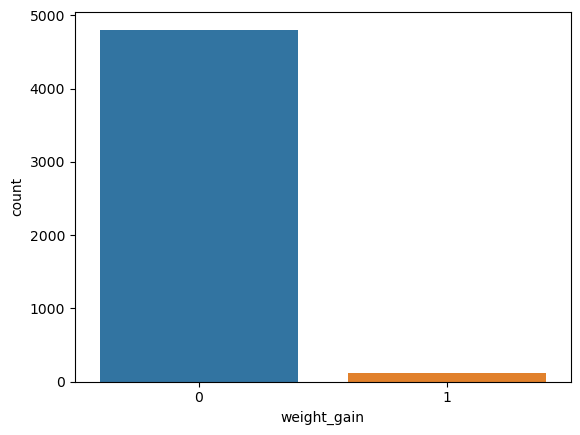

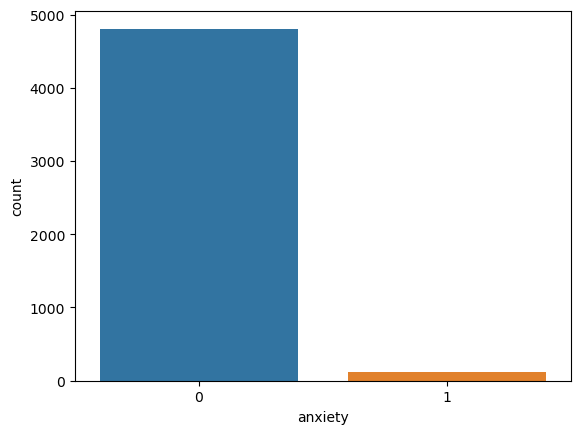

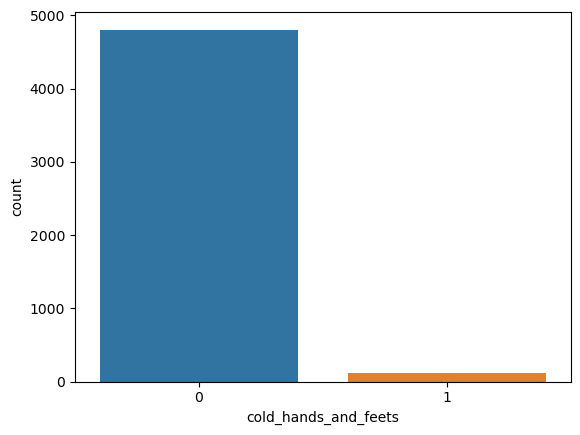

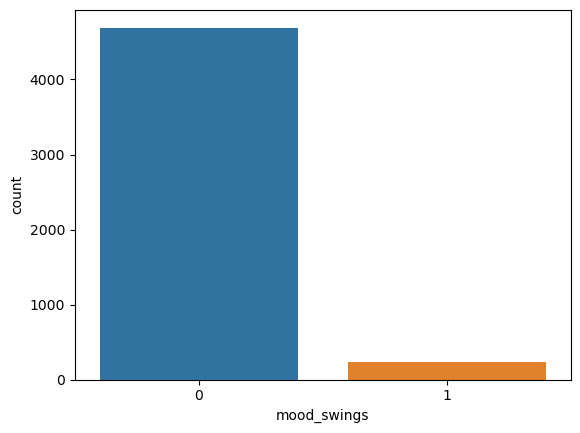

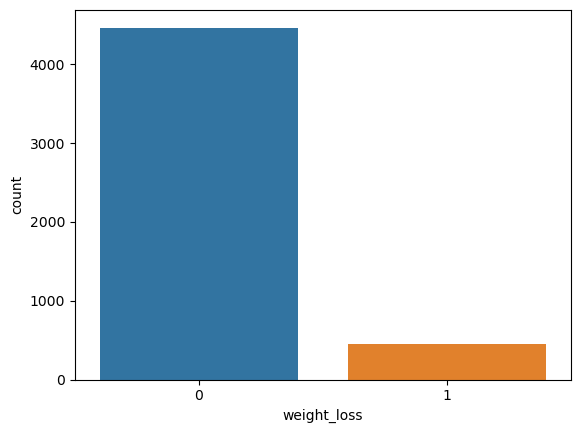

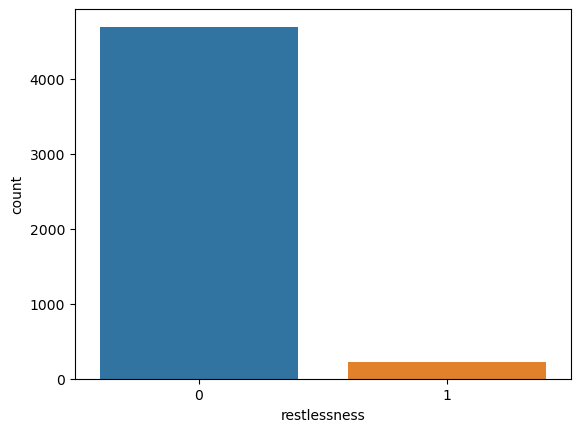

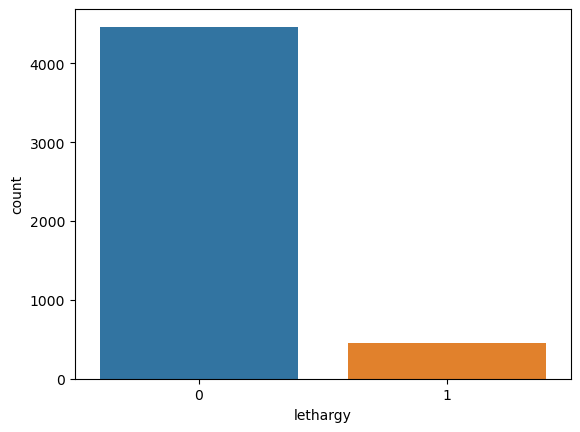

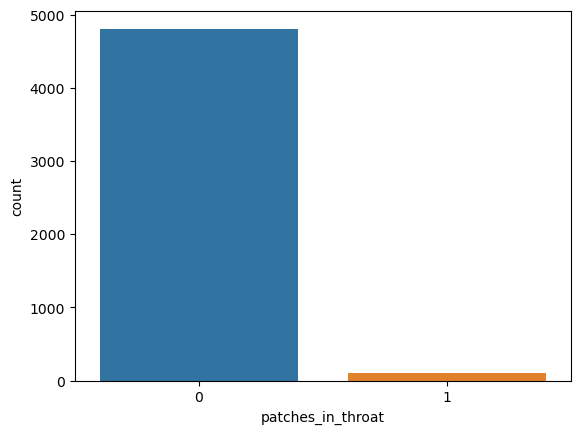

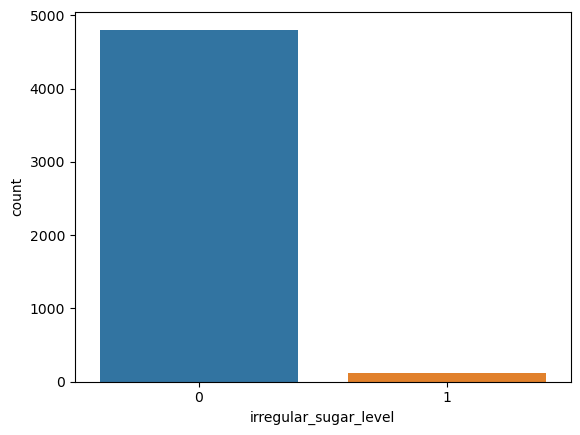

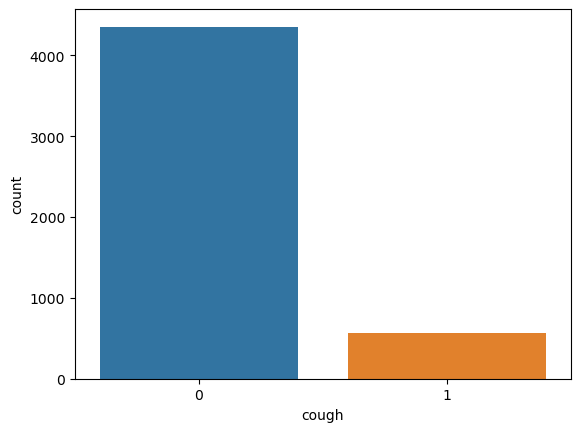

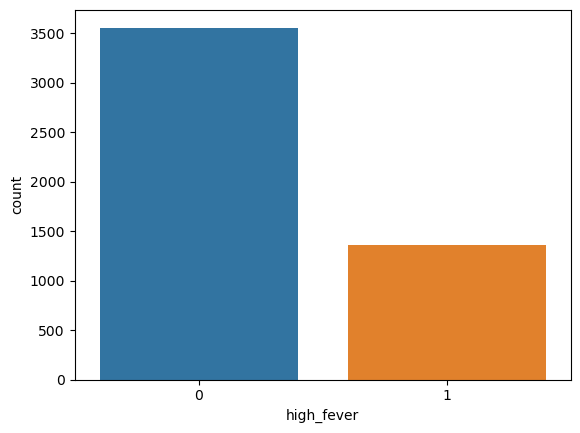

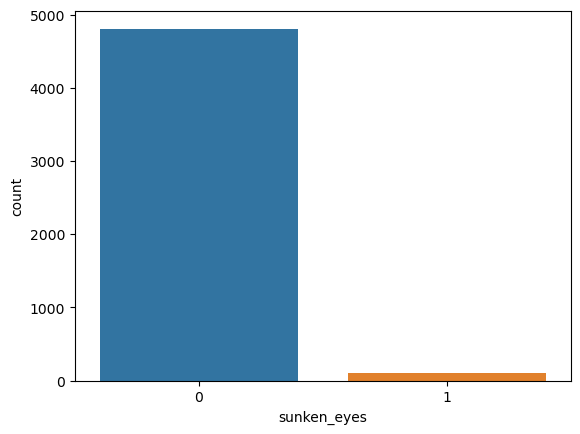

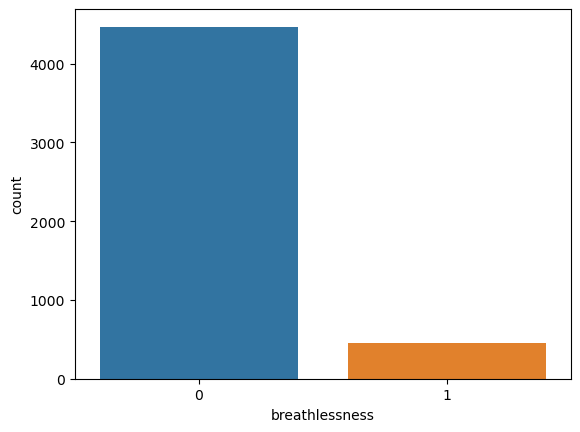

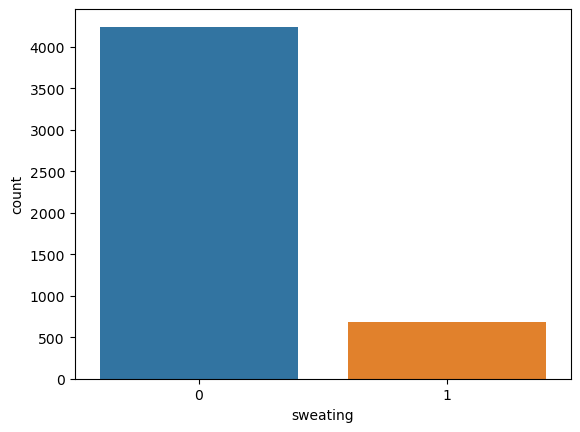

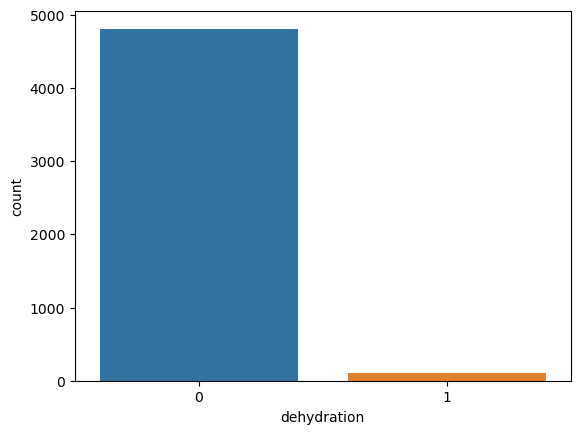

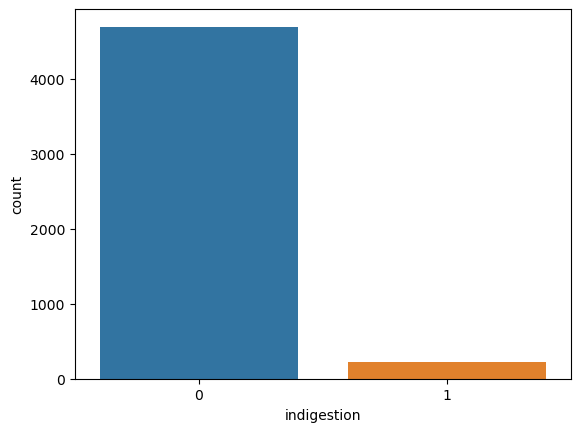

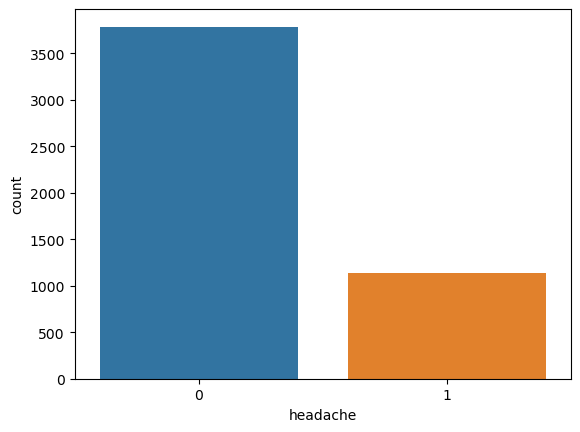

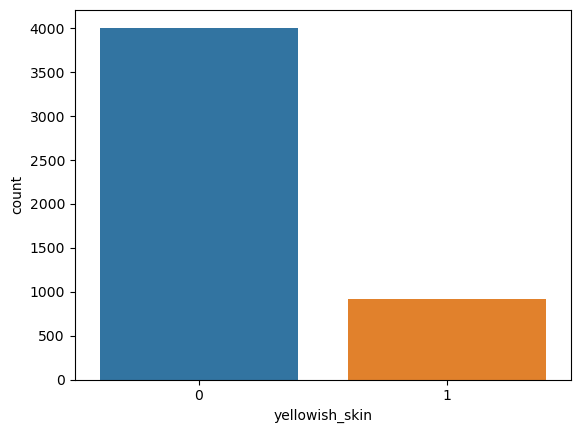

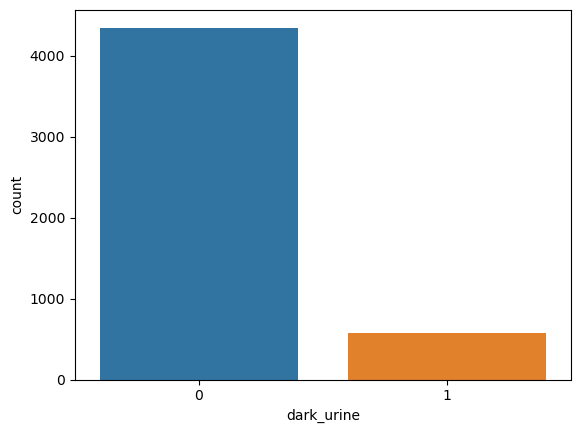

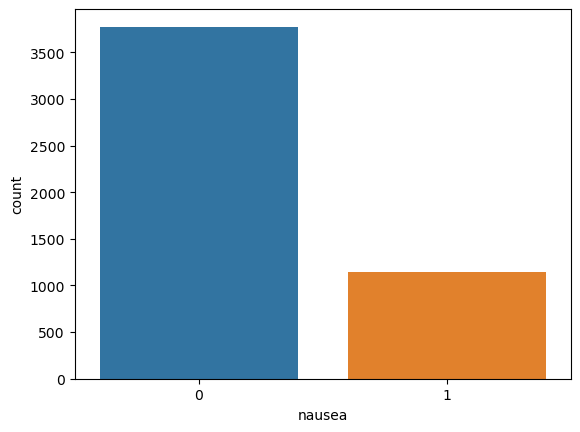

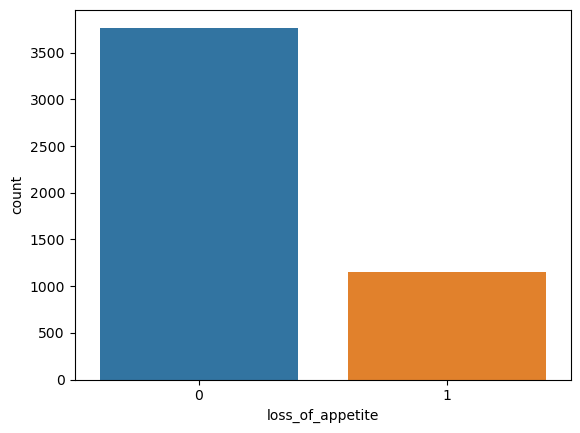

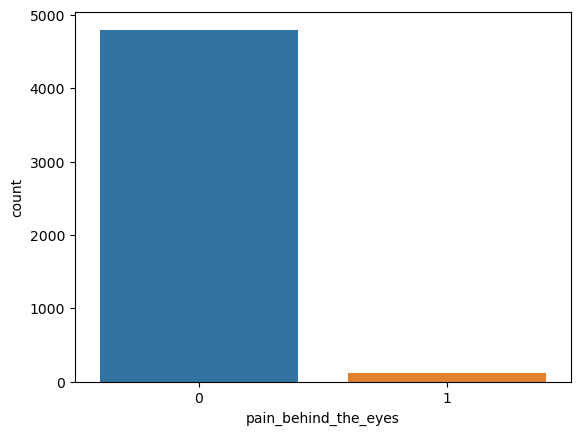

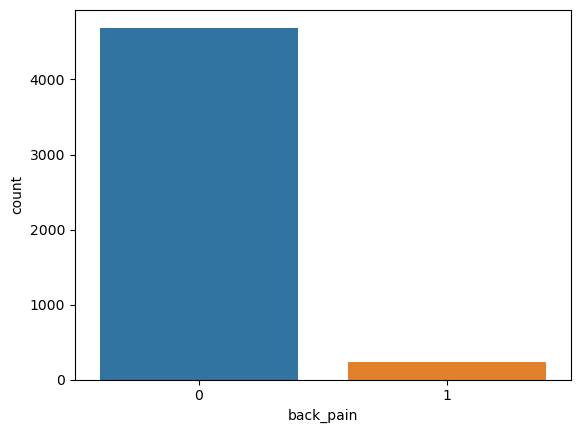

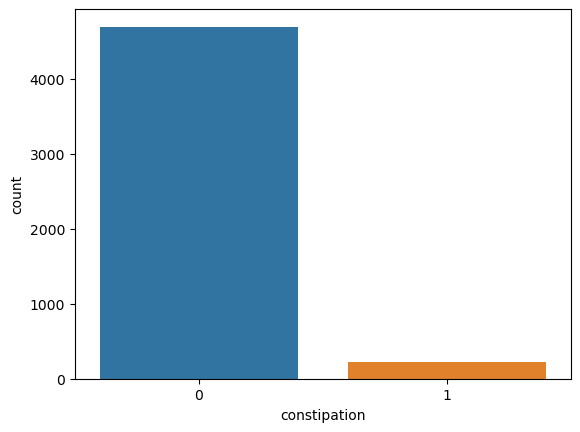

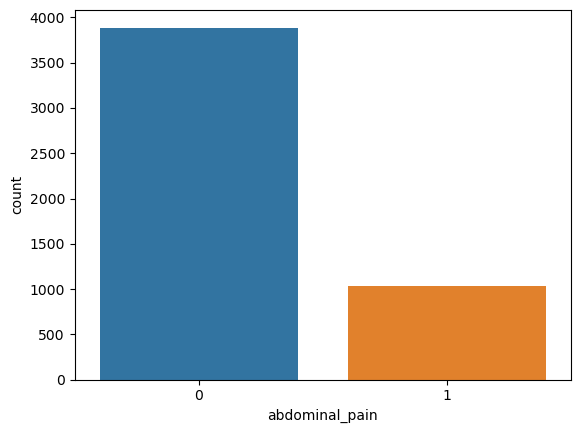

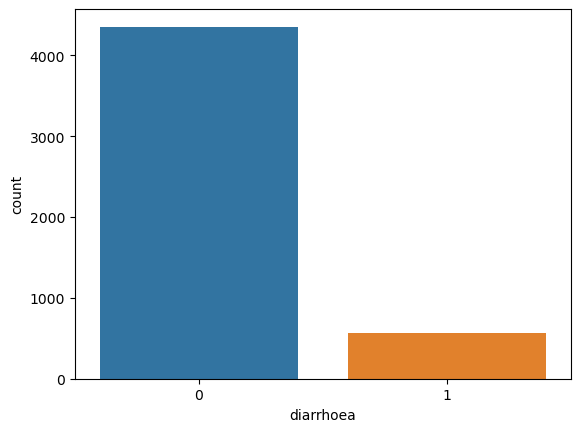

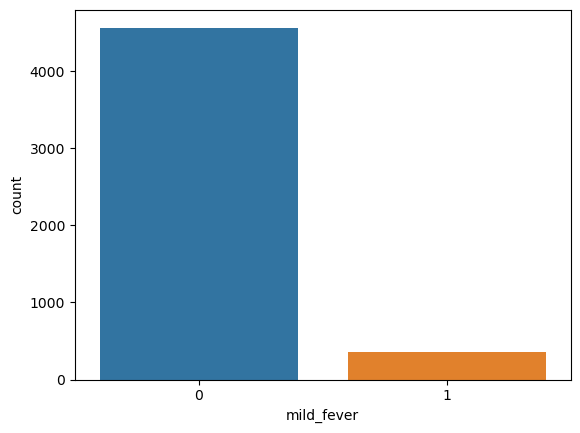

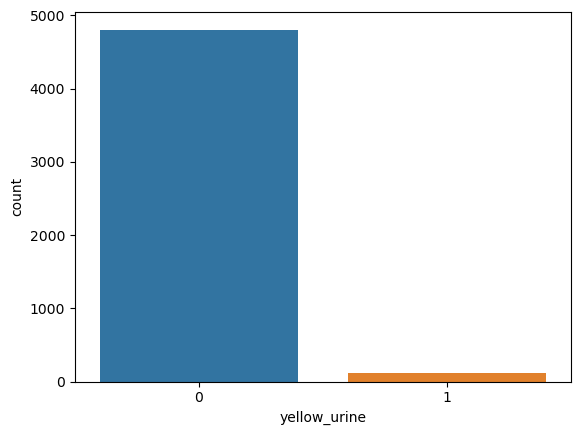

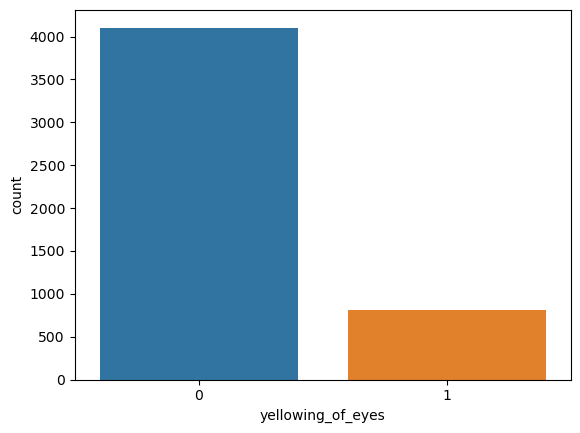

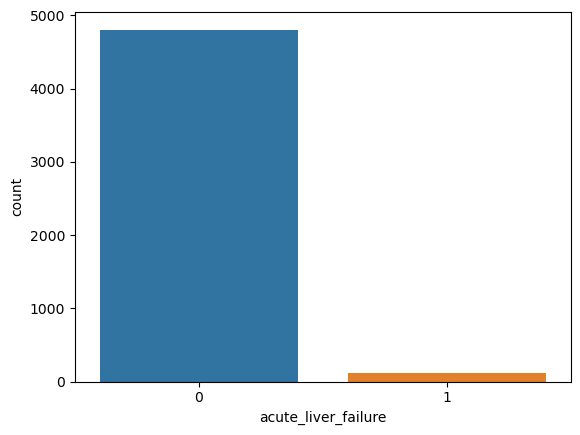

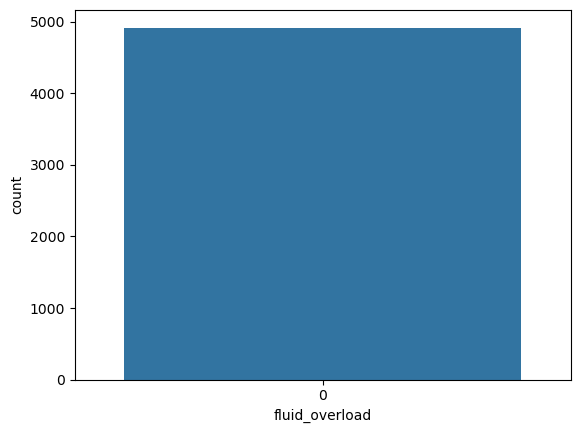

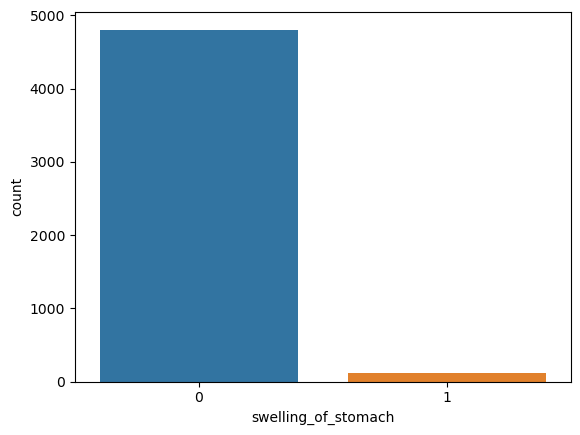

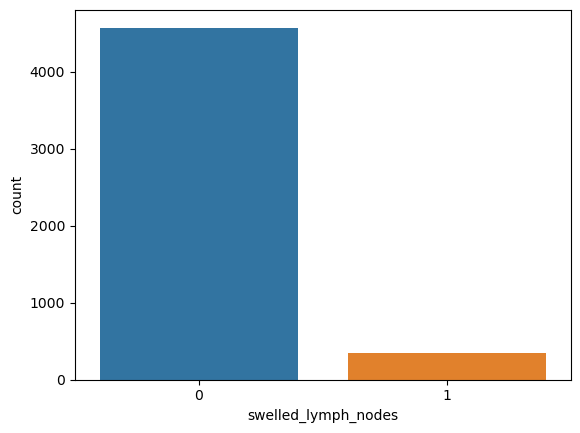

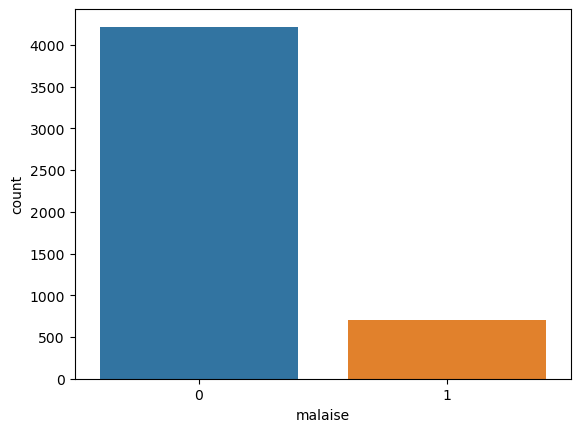

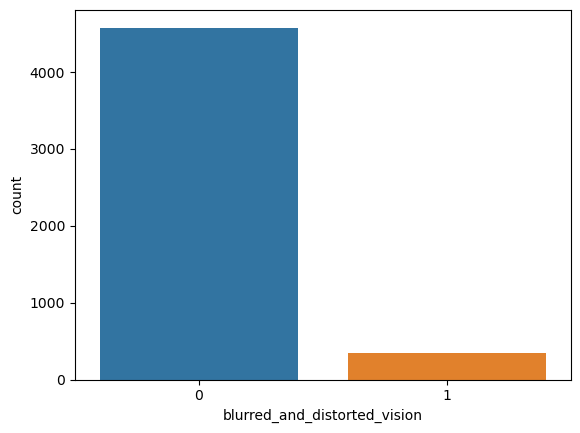

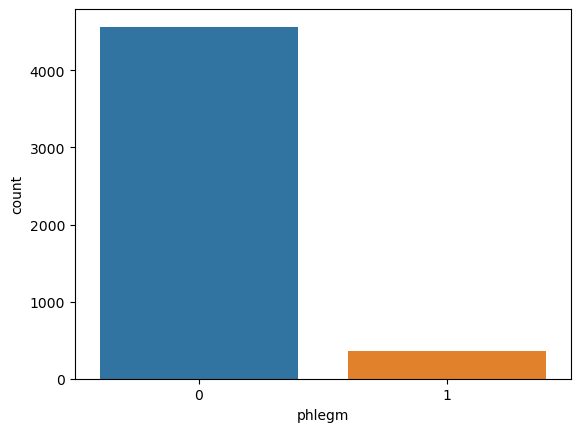

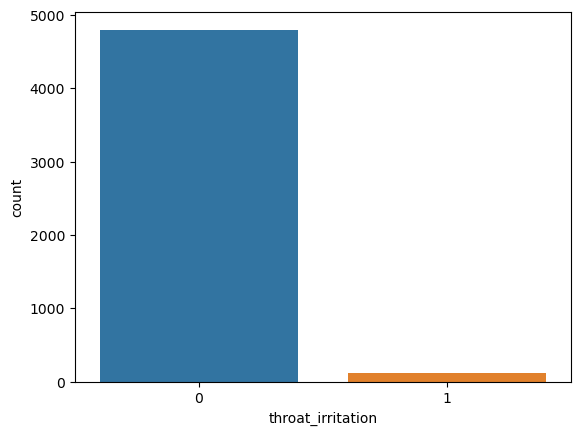

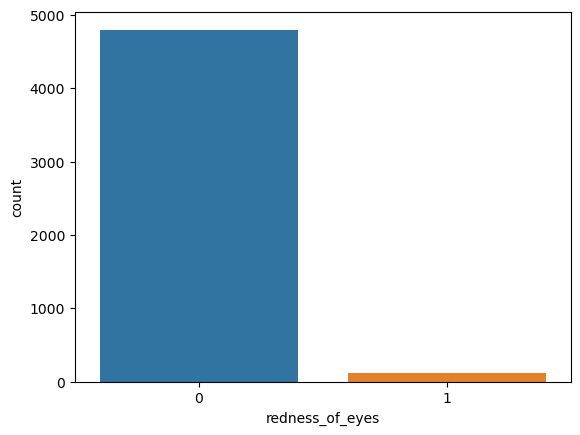

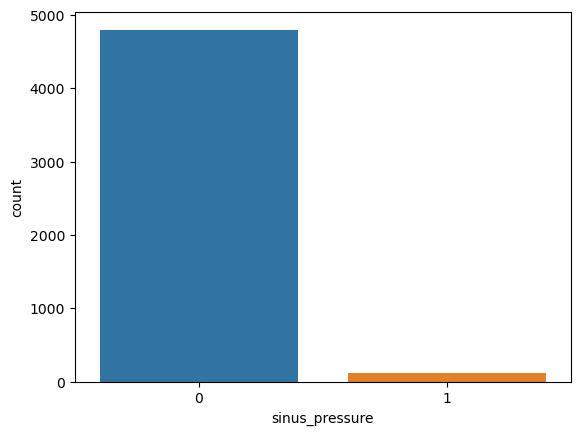

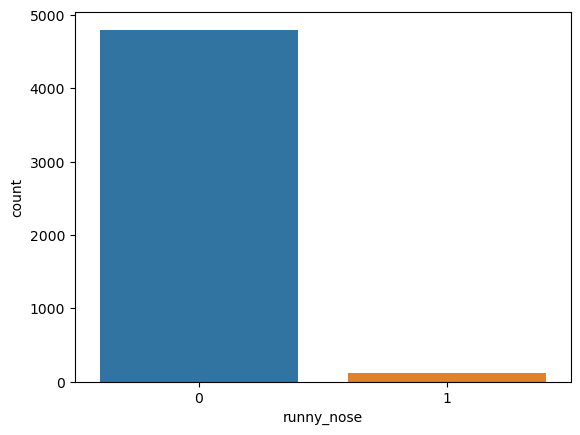

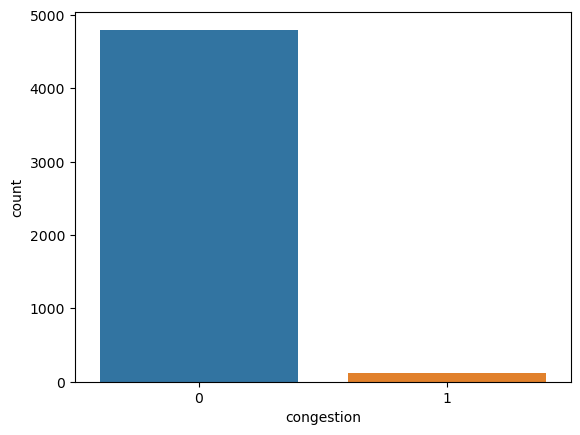

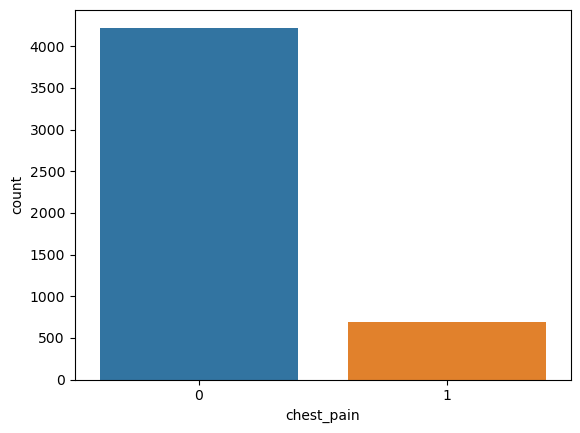

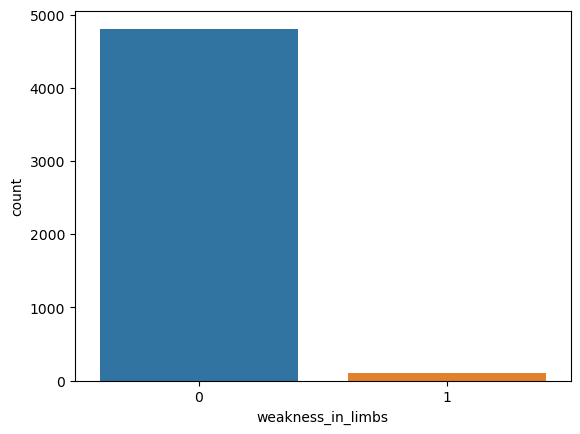

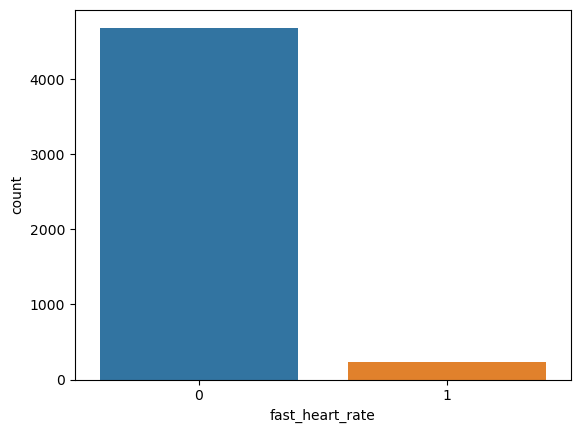

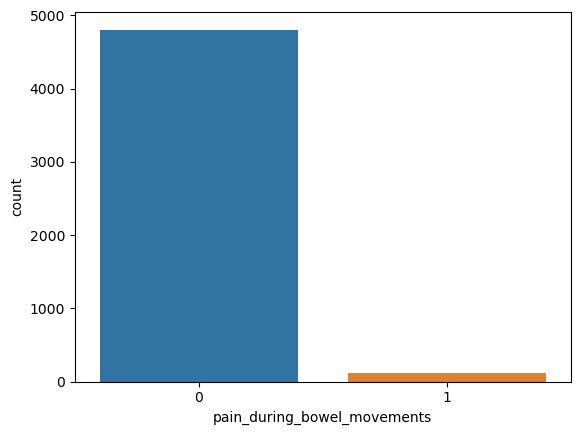

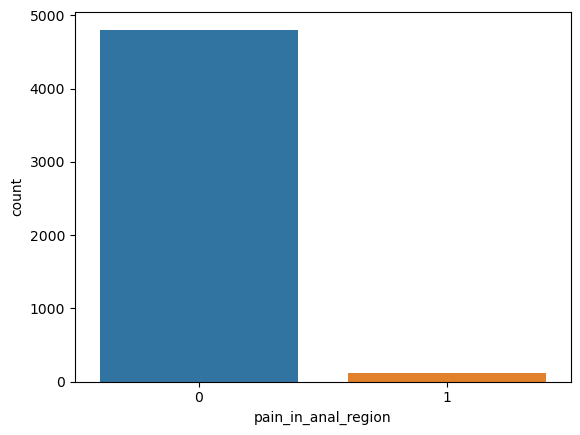

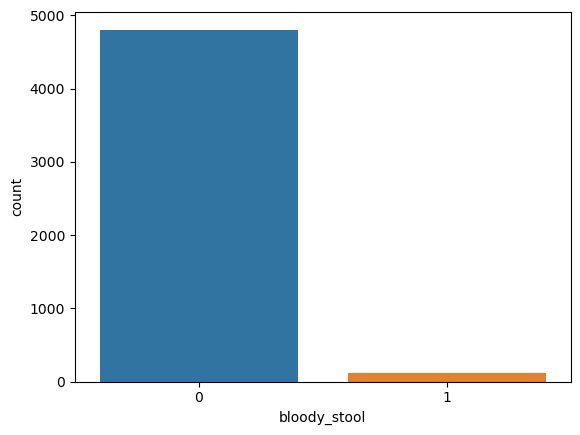

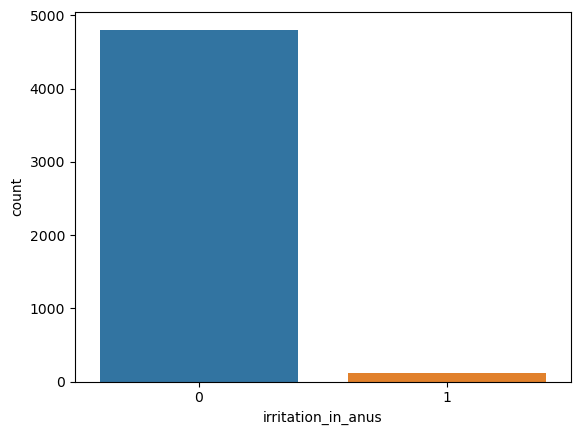

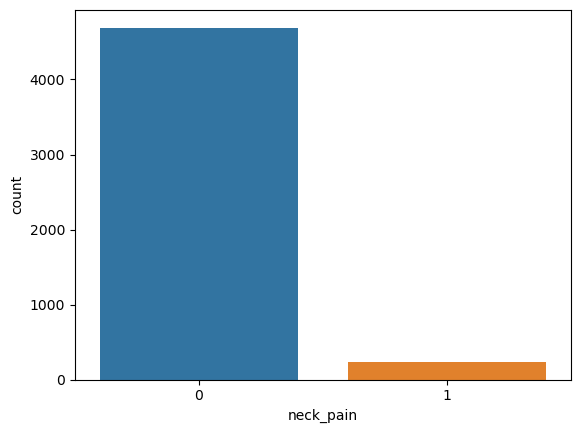

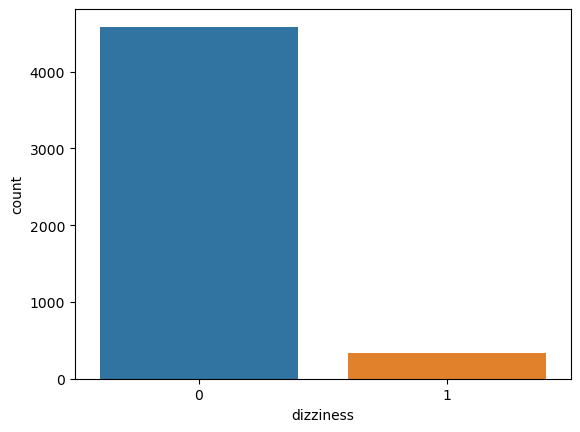

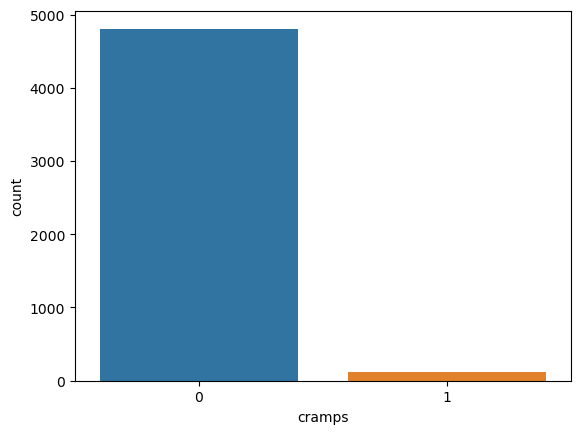

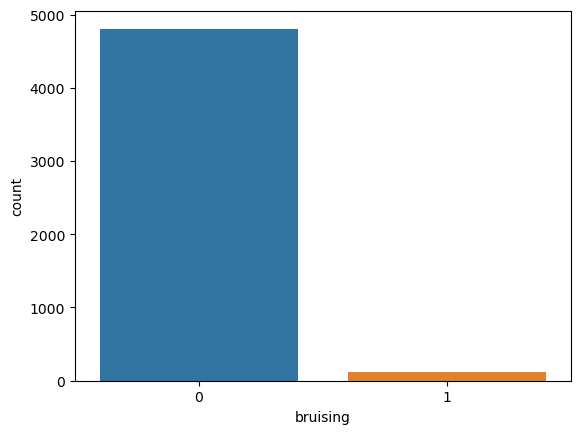

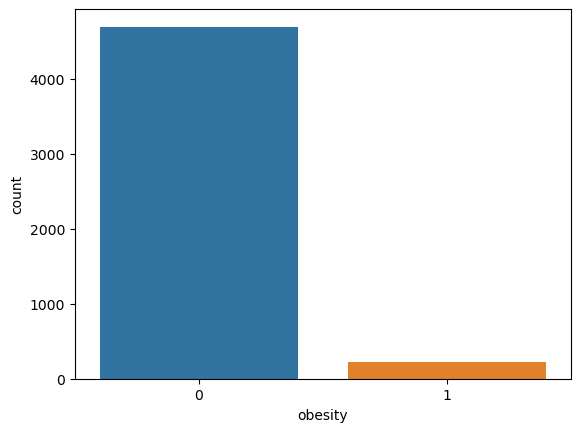

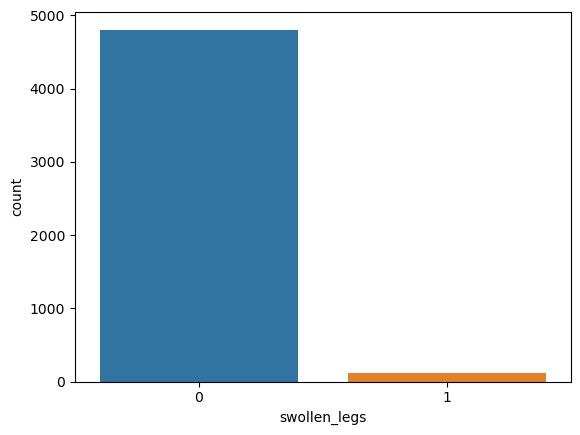

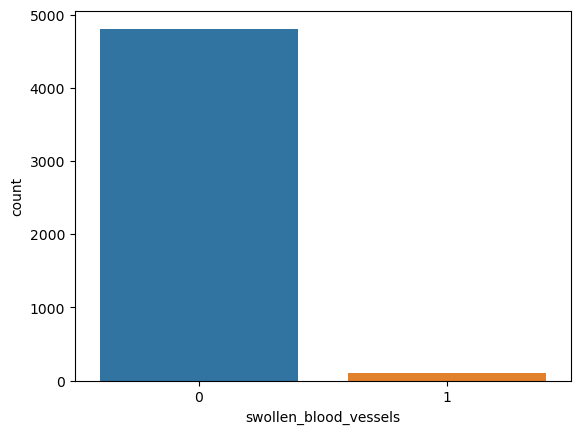

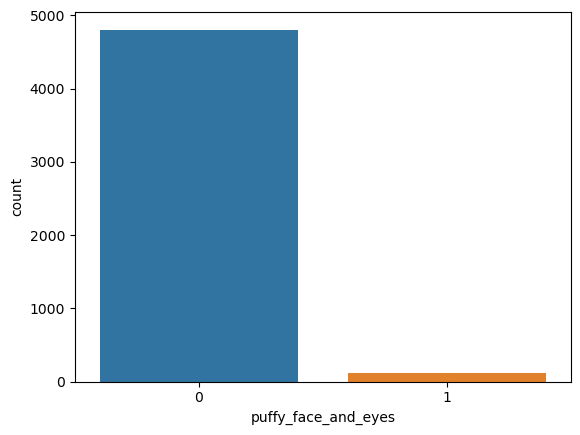

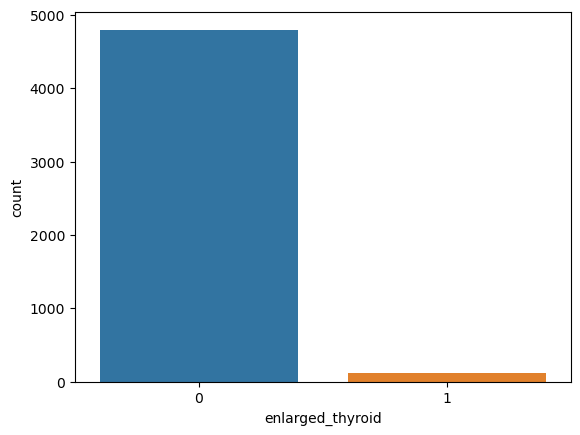

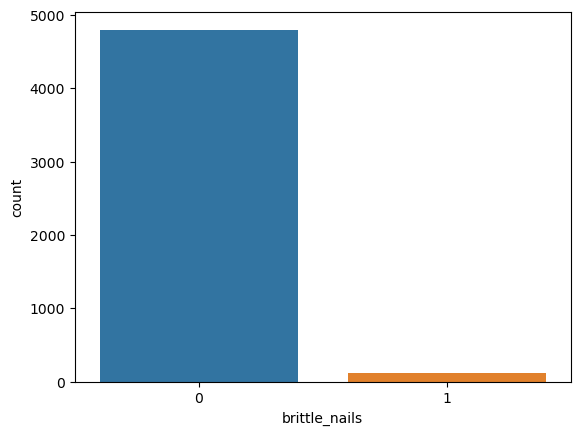

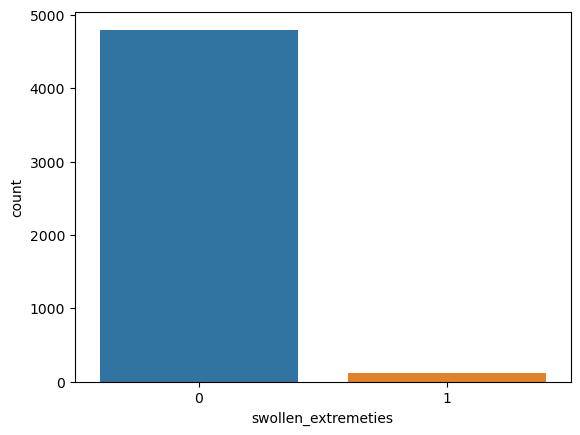

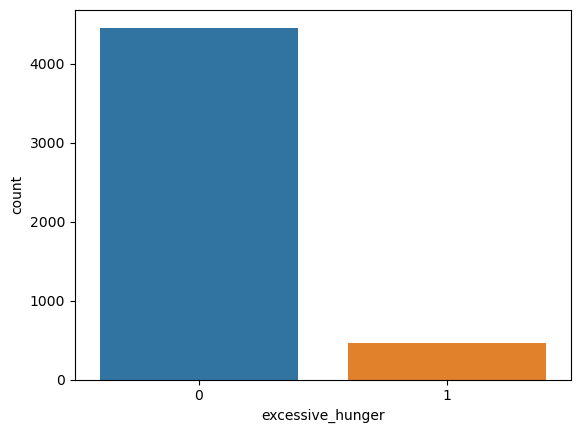

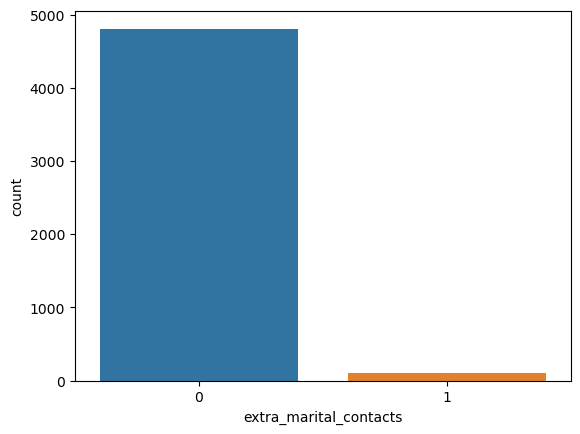

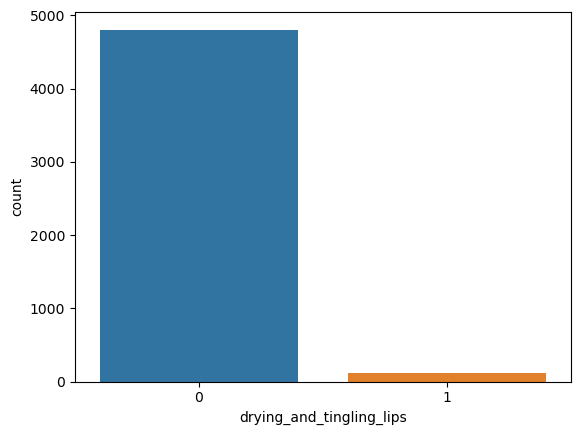

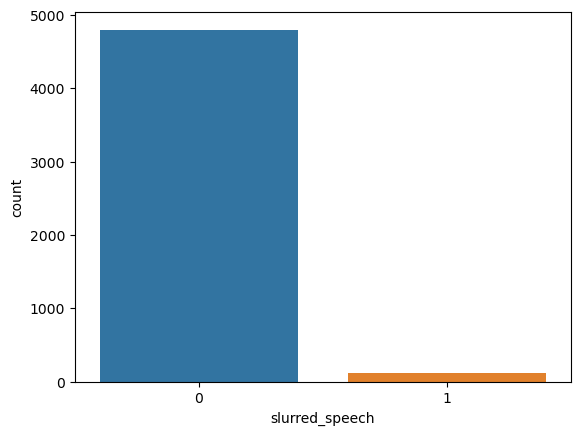

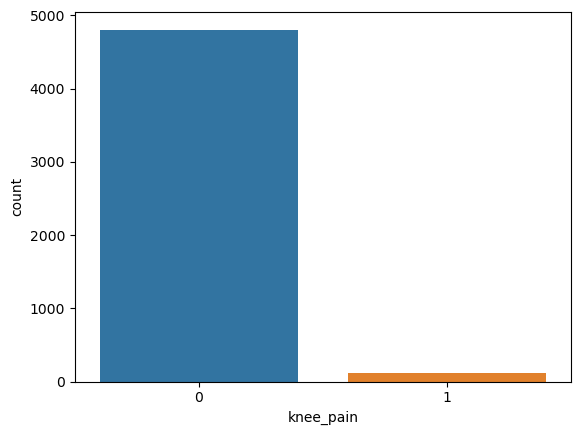

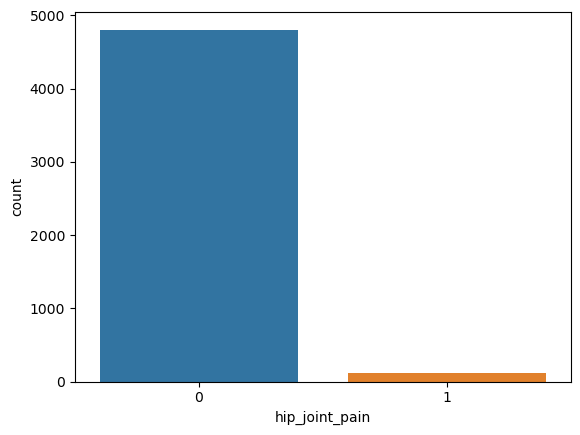

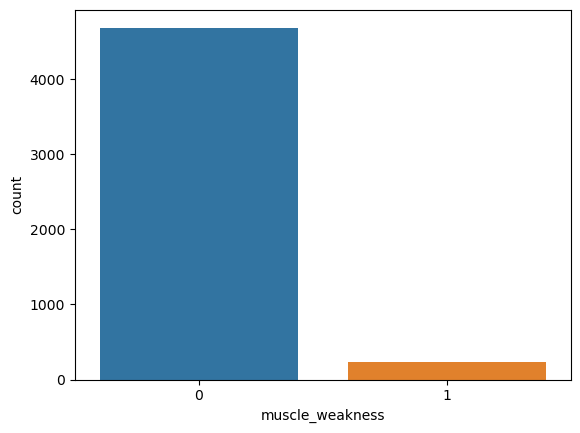

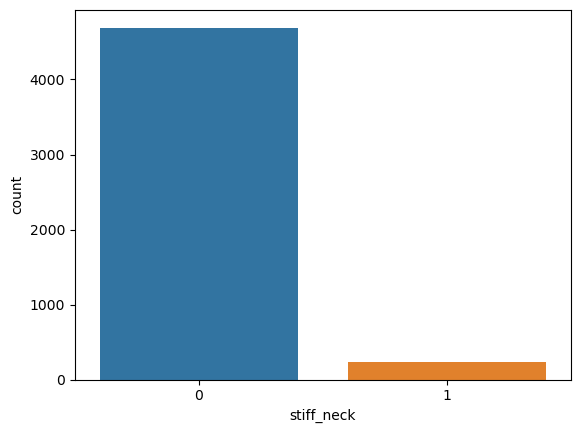

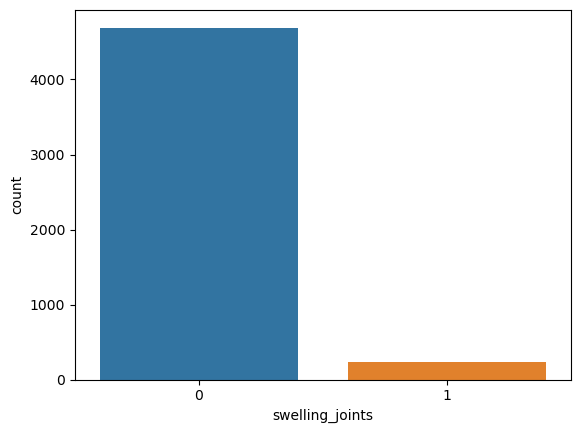

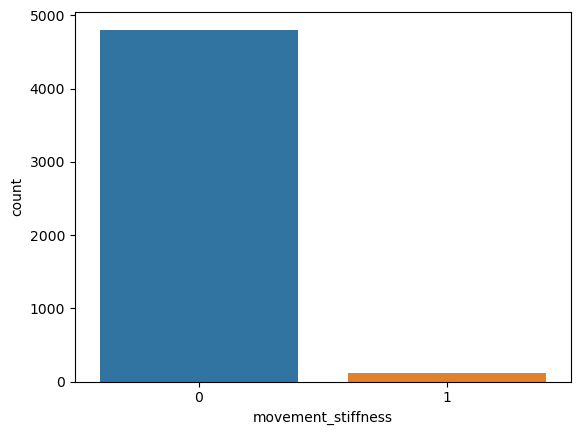

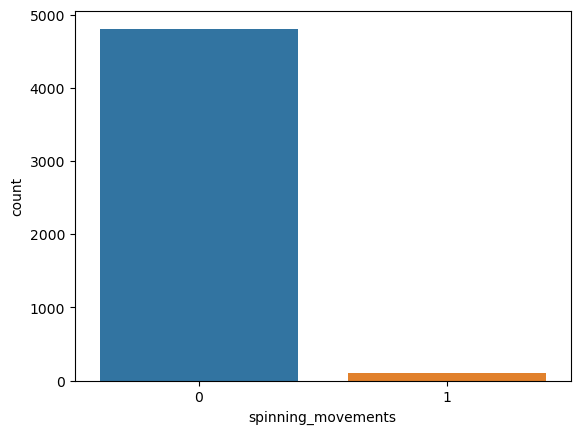

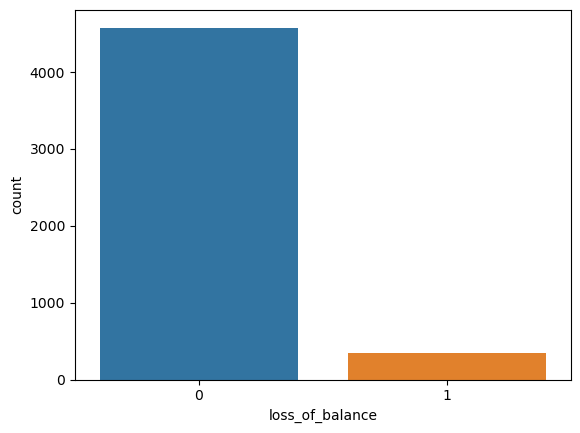

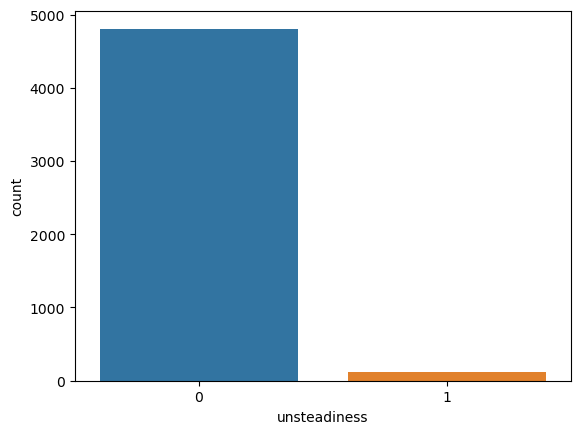

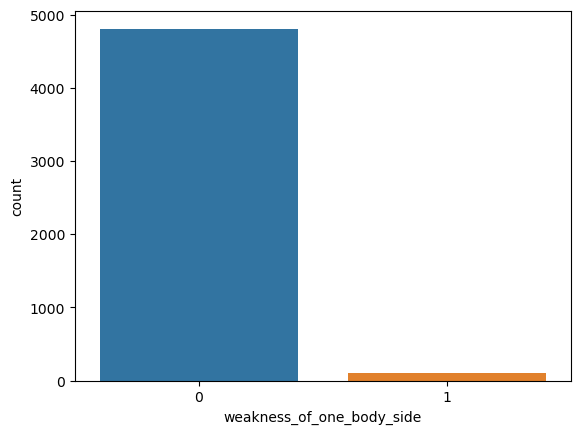

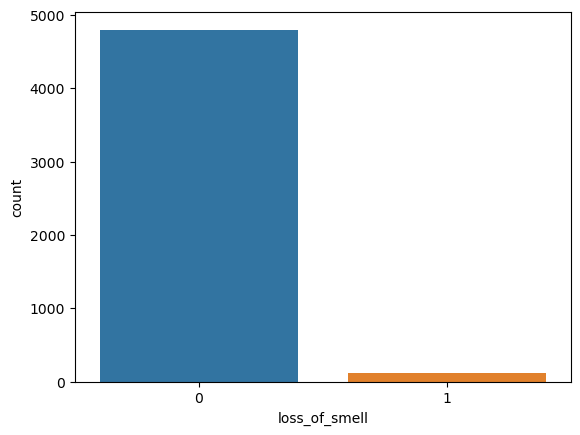

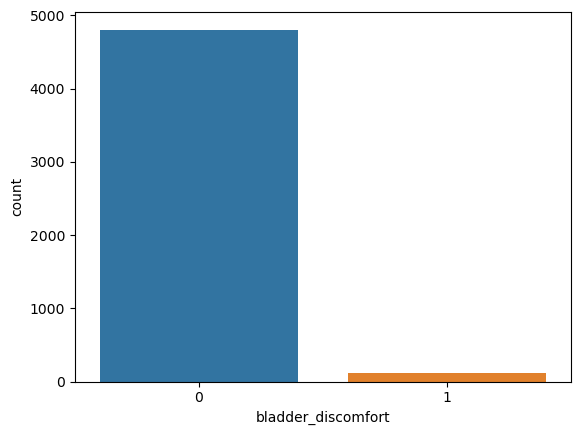

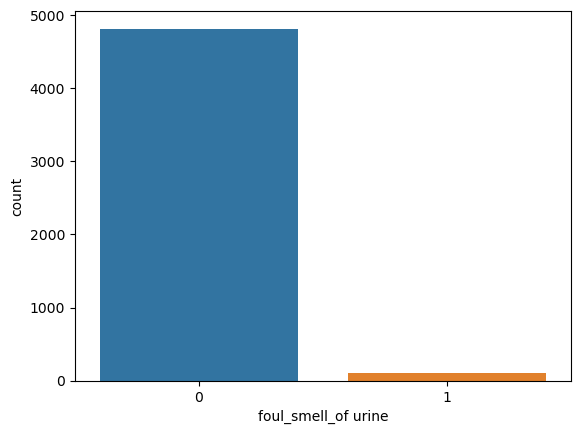

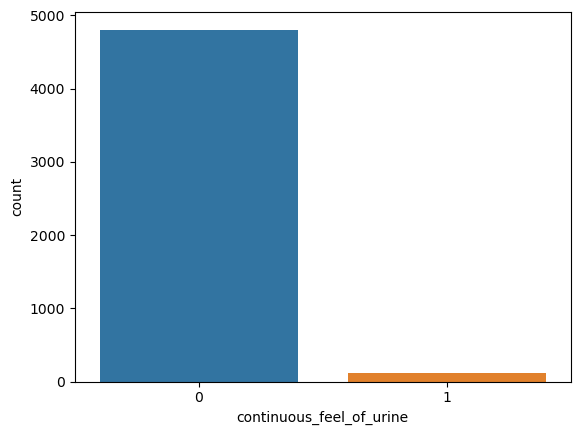

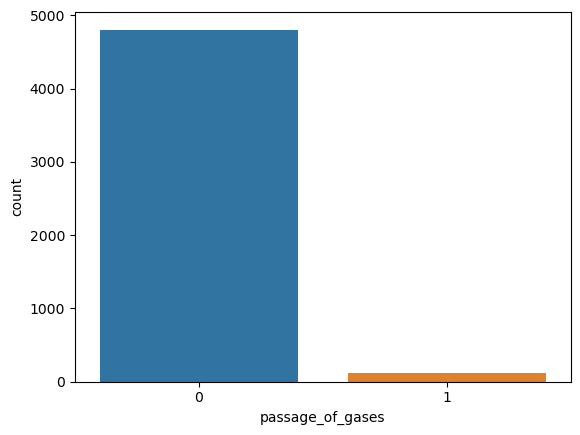

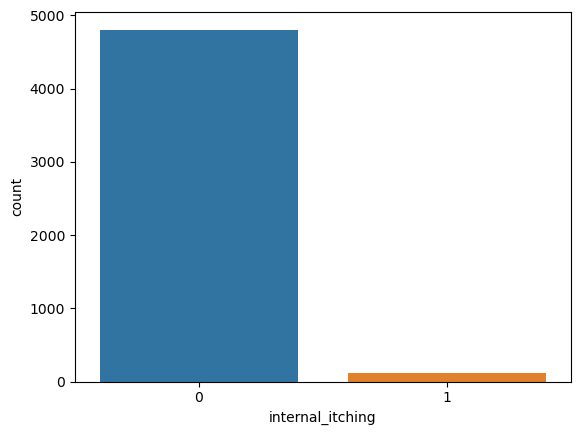

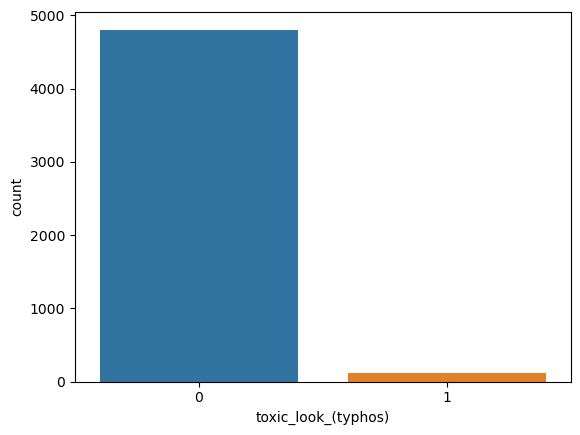

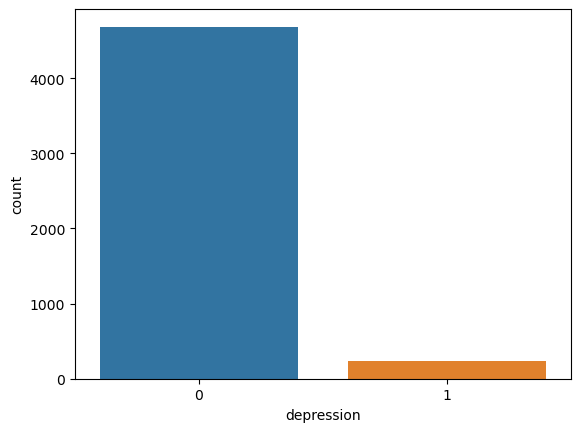

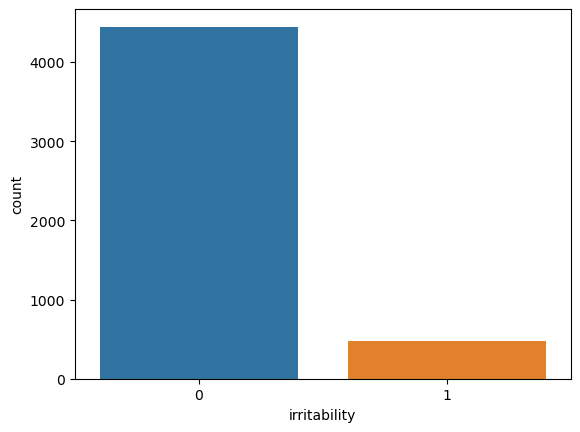

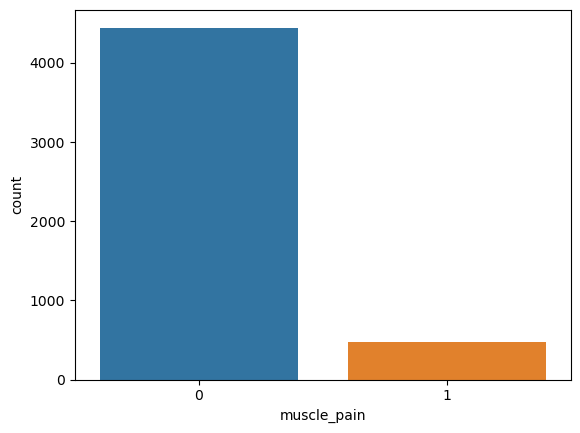

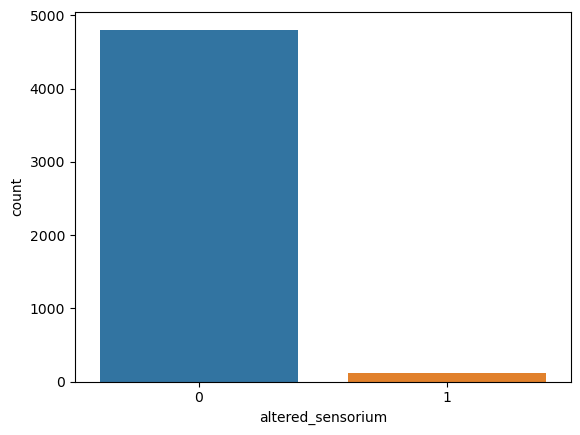

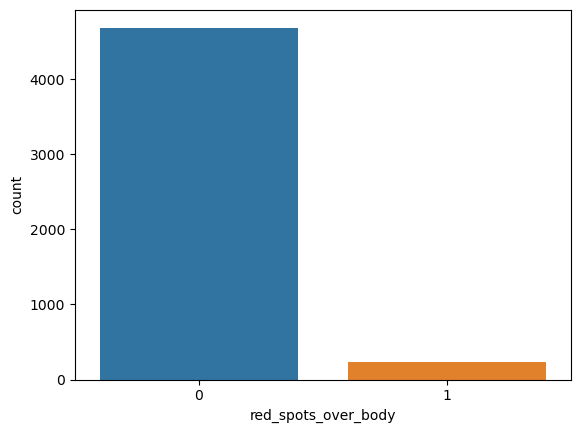

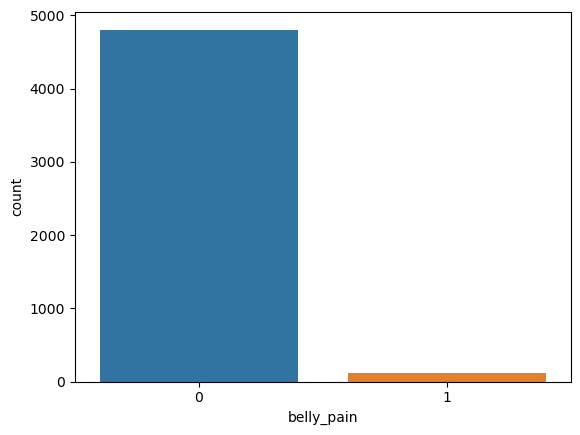

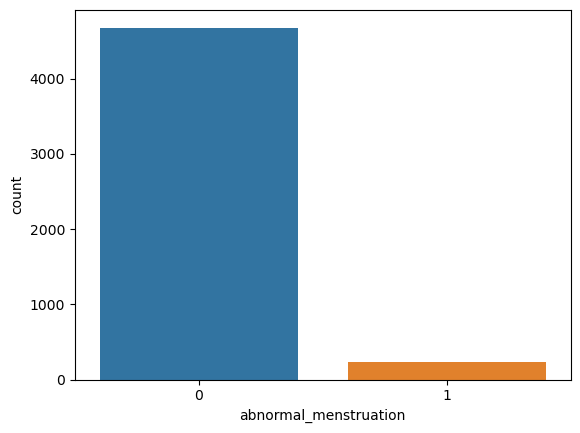

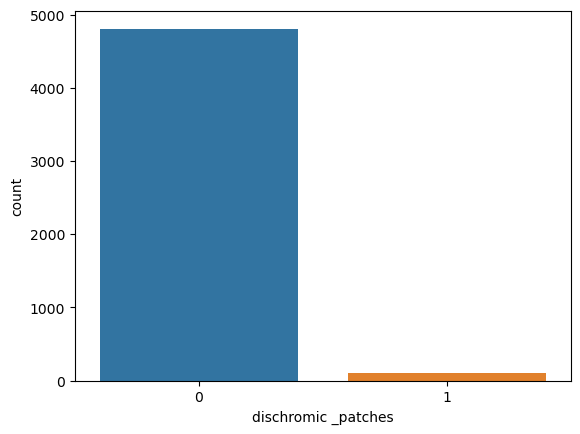

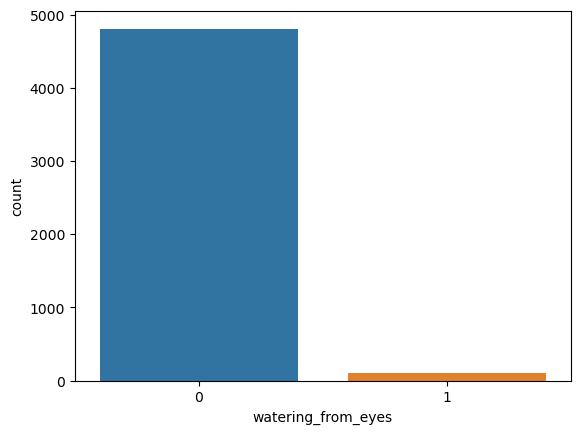

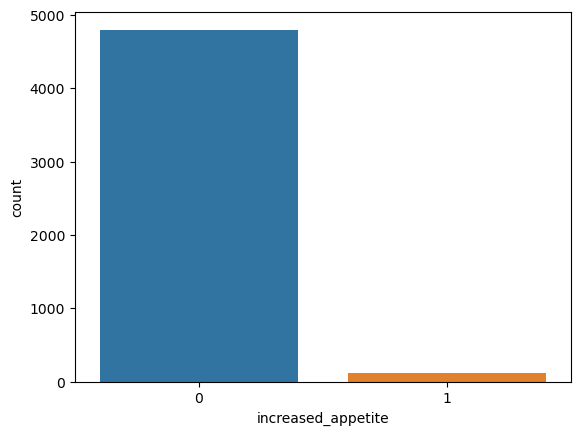

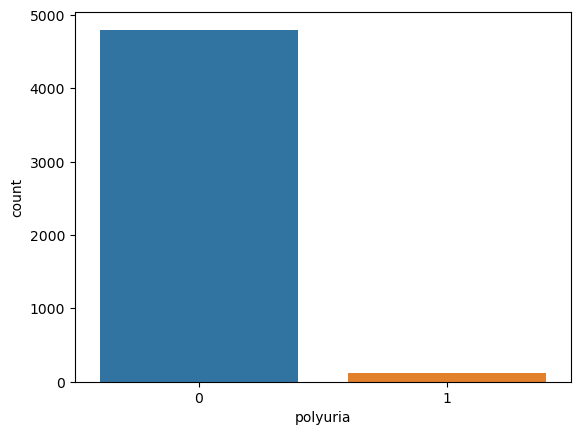

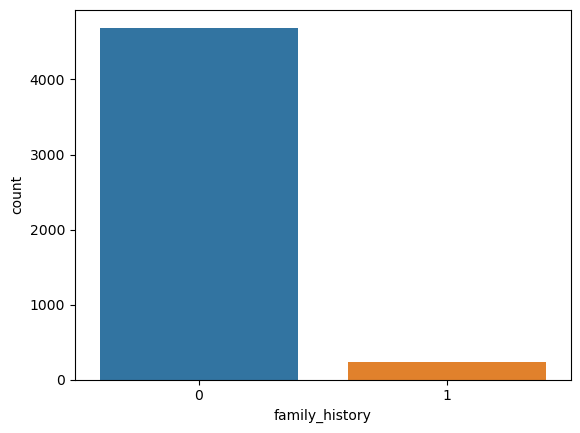

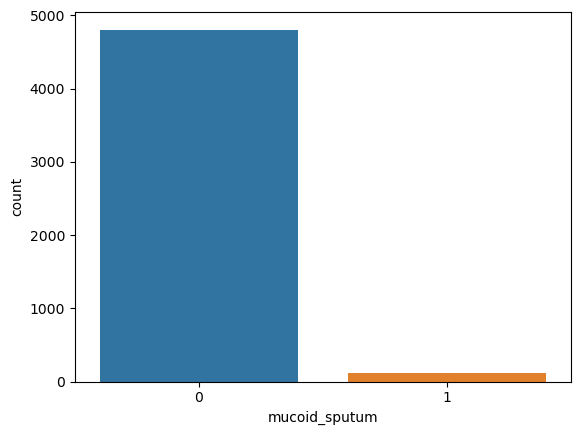

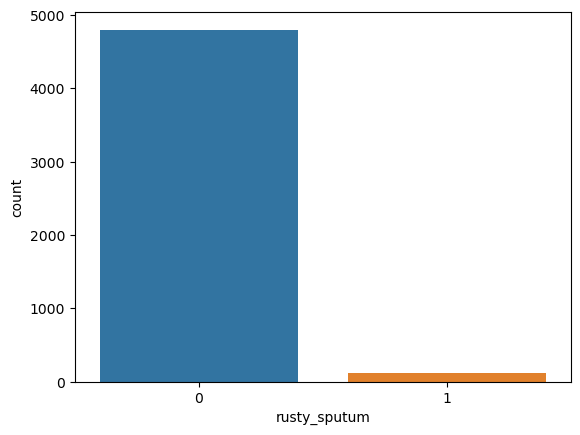

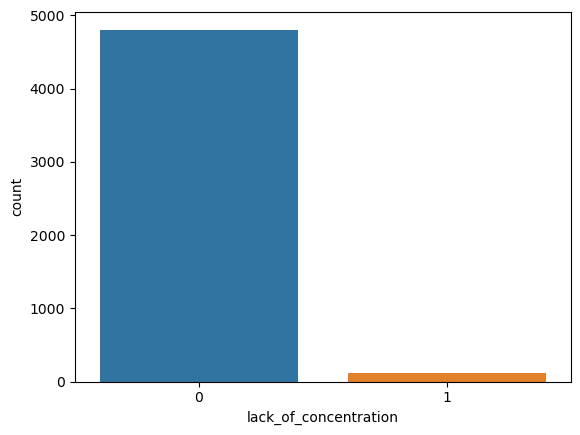

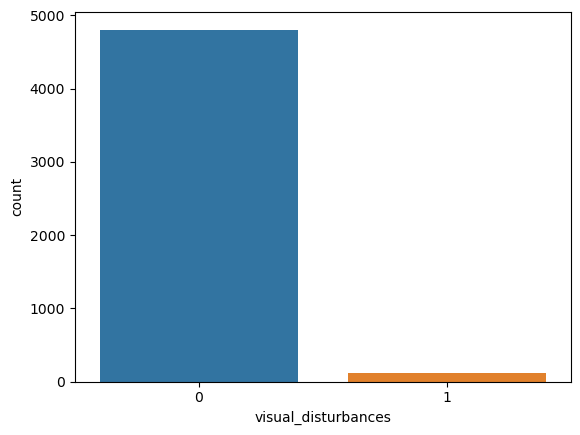

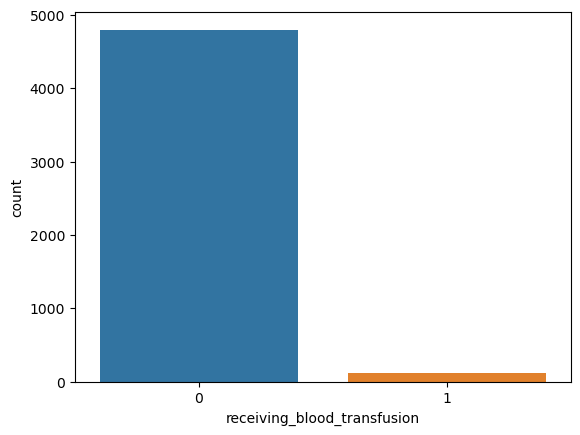

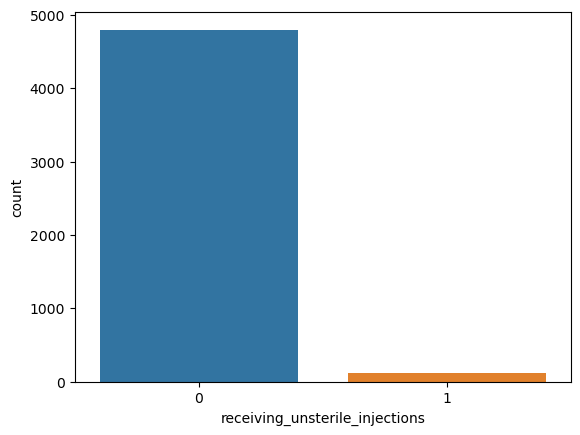

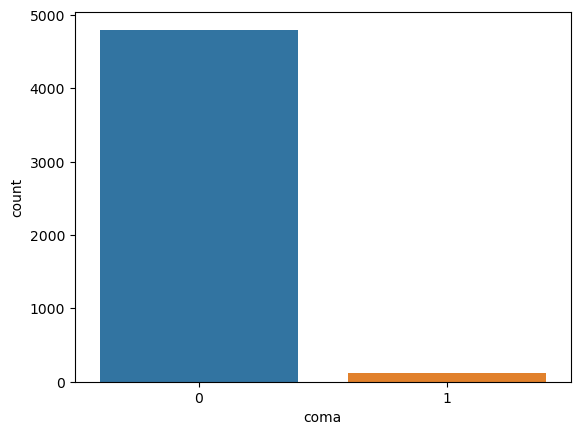

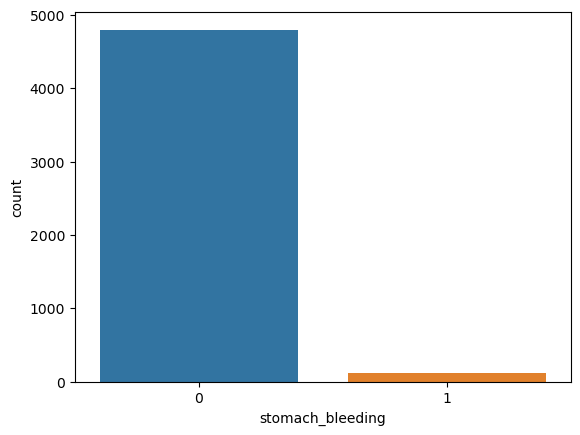

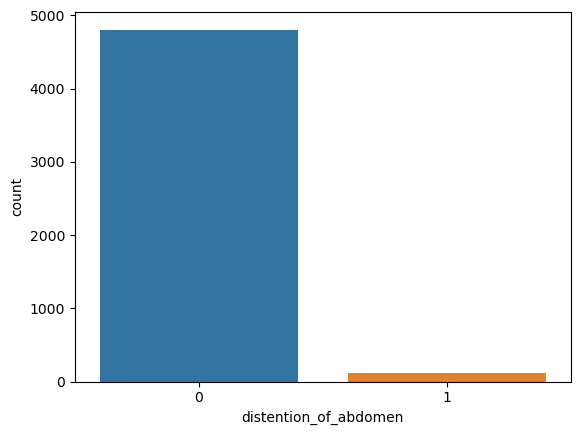

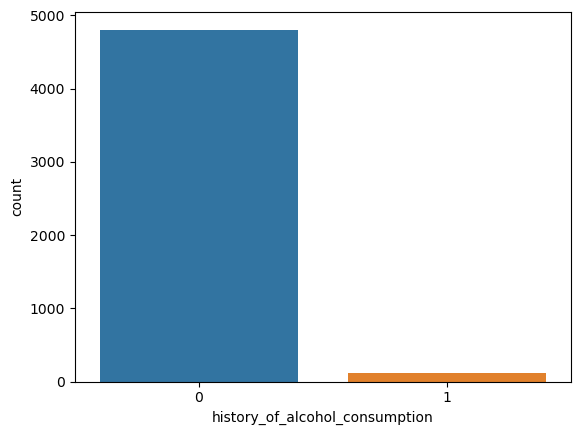

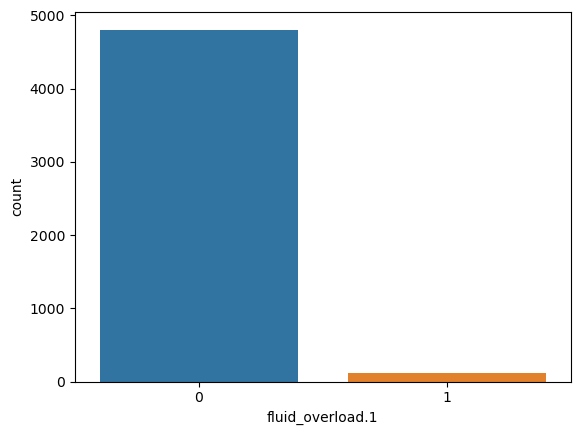

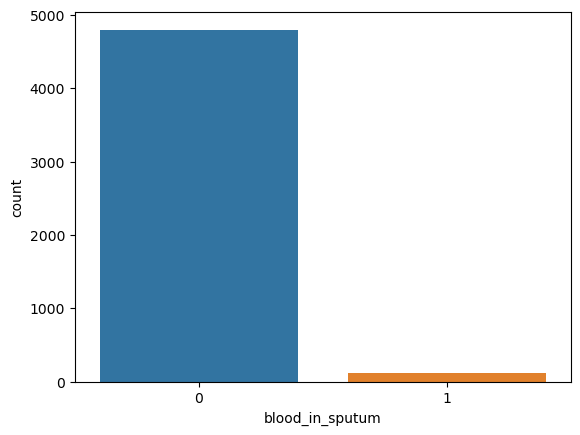

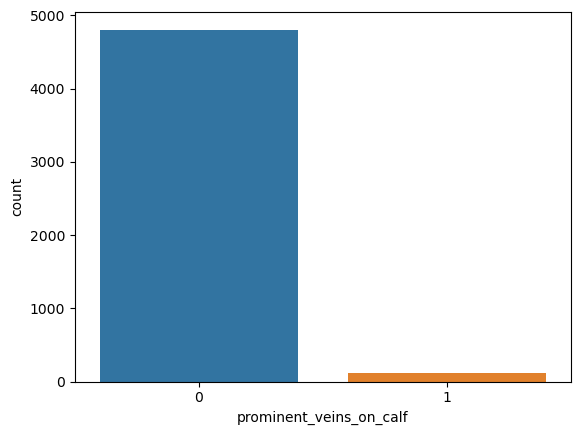

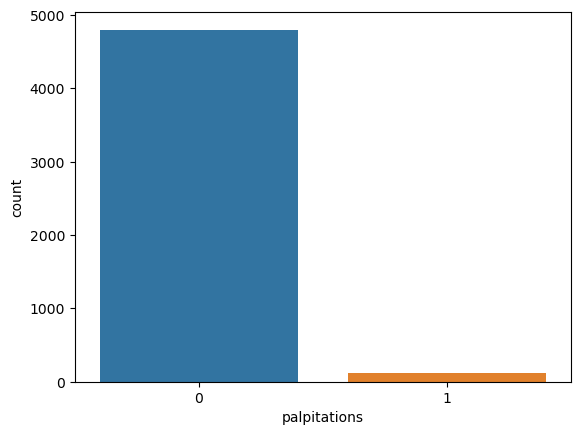

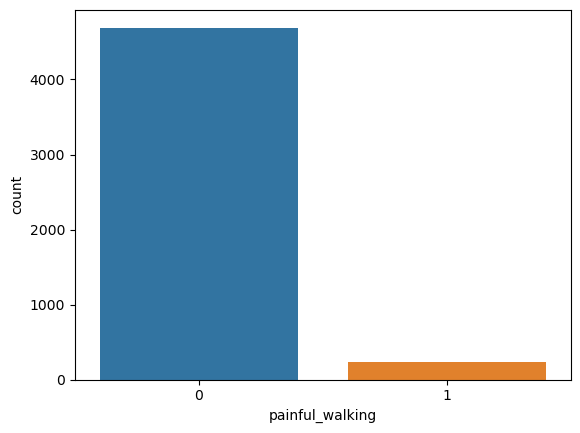

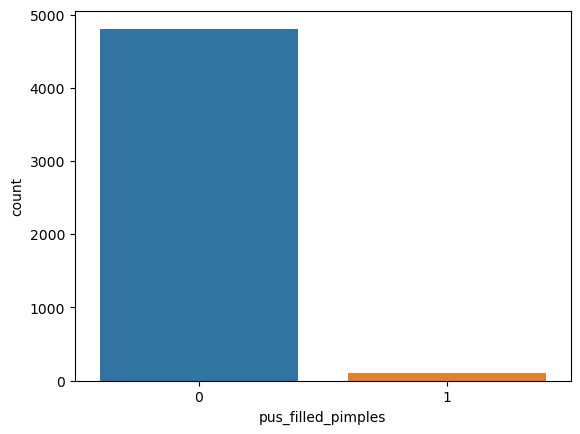

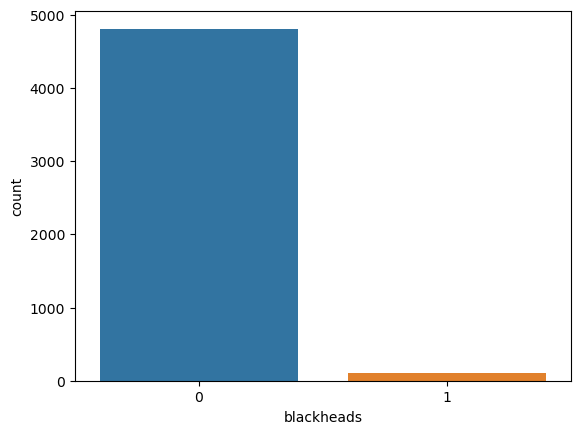

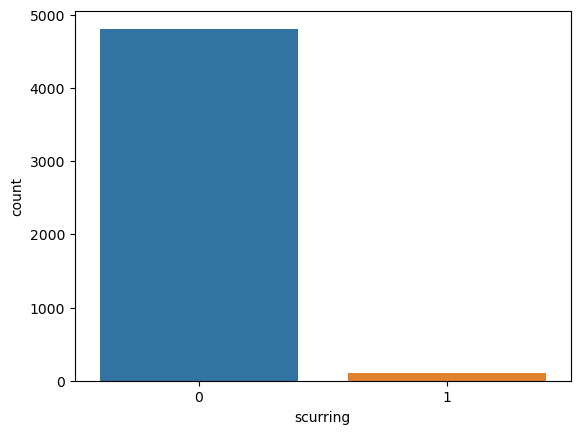

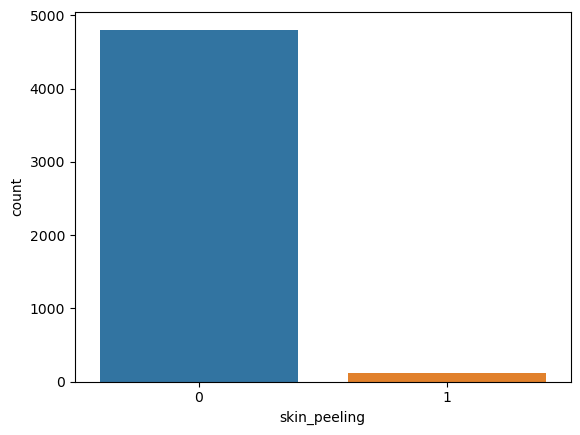

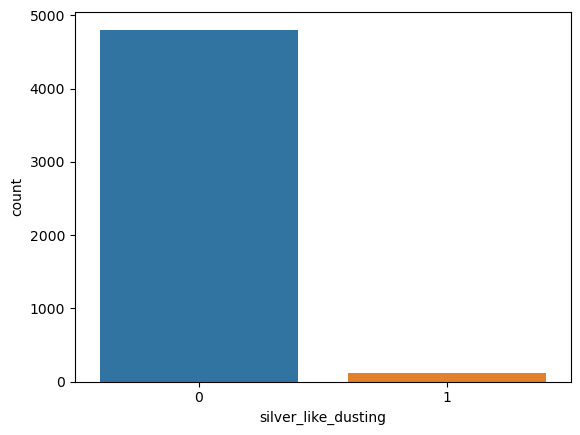

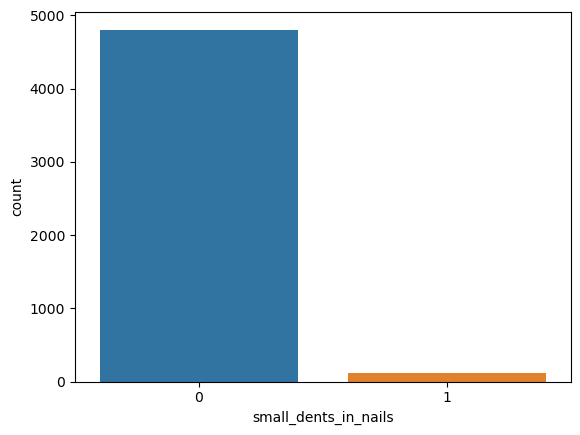

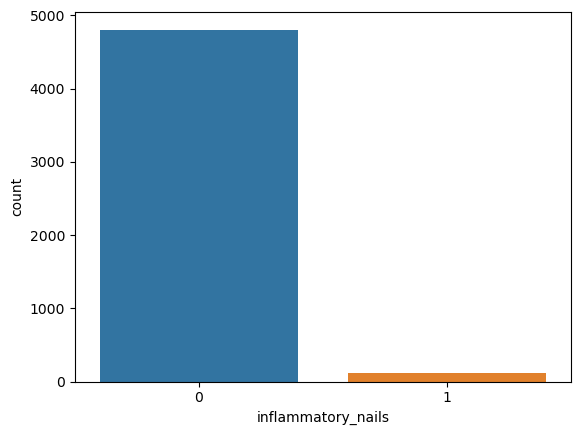

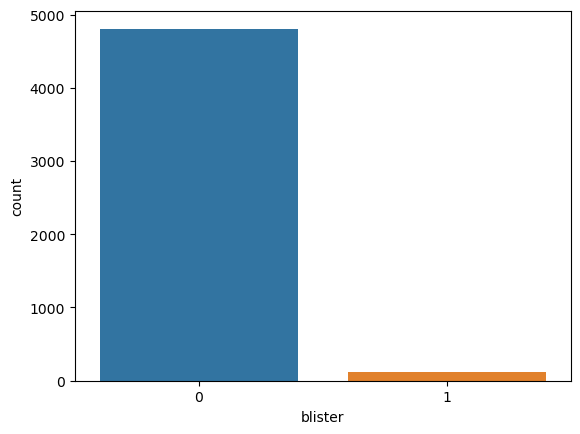

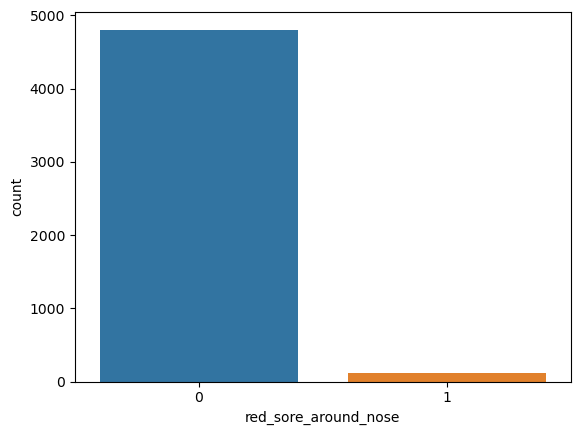

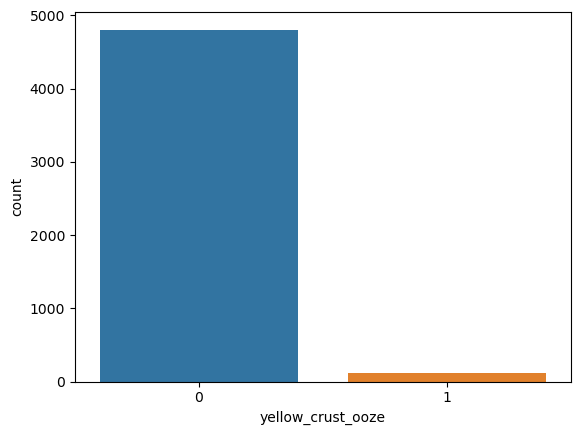

In [14]:
for col in train_set.columns:
    if col =='prognosis':
        continue
    sns.countplot(data = train_set , x = col)
    plt.show()


In [15]:
# Get the number of missing data points, NA's ,NAN's values per column
total = train_set.isnull().sum().sort_values(ascending=False)
percent = (train_set.isnull().sum()/train_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

total = train_set.isna().sum().sort_values(ascending=False)
percent = (train_set.isna().sum()/train_set.isna().count()).sort_values(ascending=False)
na_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

if((na_data.all()).all()>0 or (na_data.all()).all()>0):
     print('Found Missing Data or NA values')
        
else:
    print('There is no missing data or null values in the collected data. Additionally, the length of each column is same.')

There is no missing data or null values in the collected data. Additionally, the length of each column is same.


### Detecting Outliers

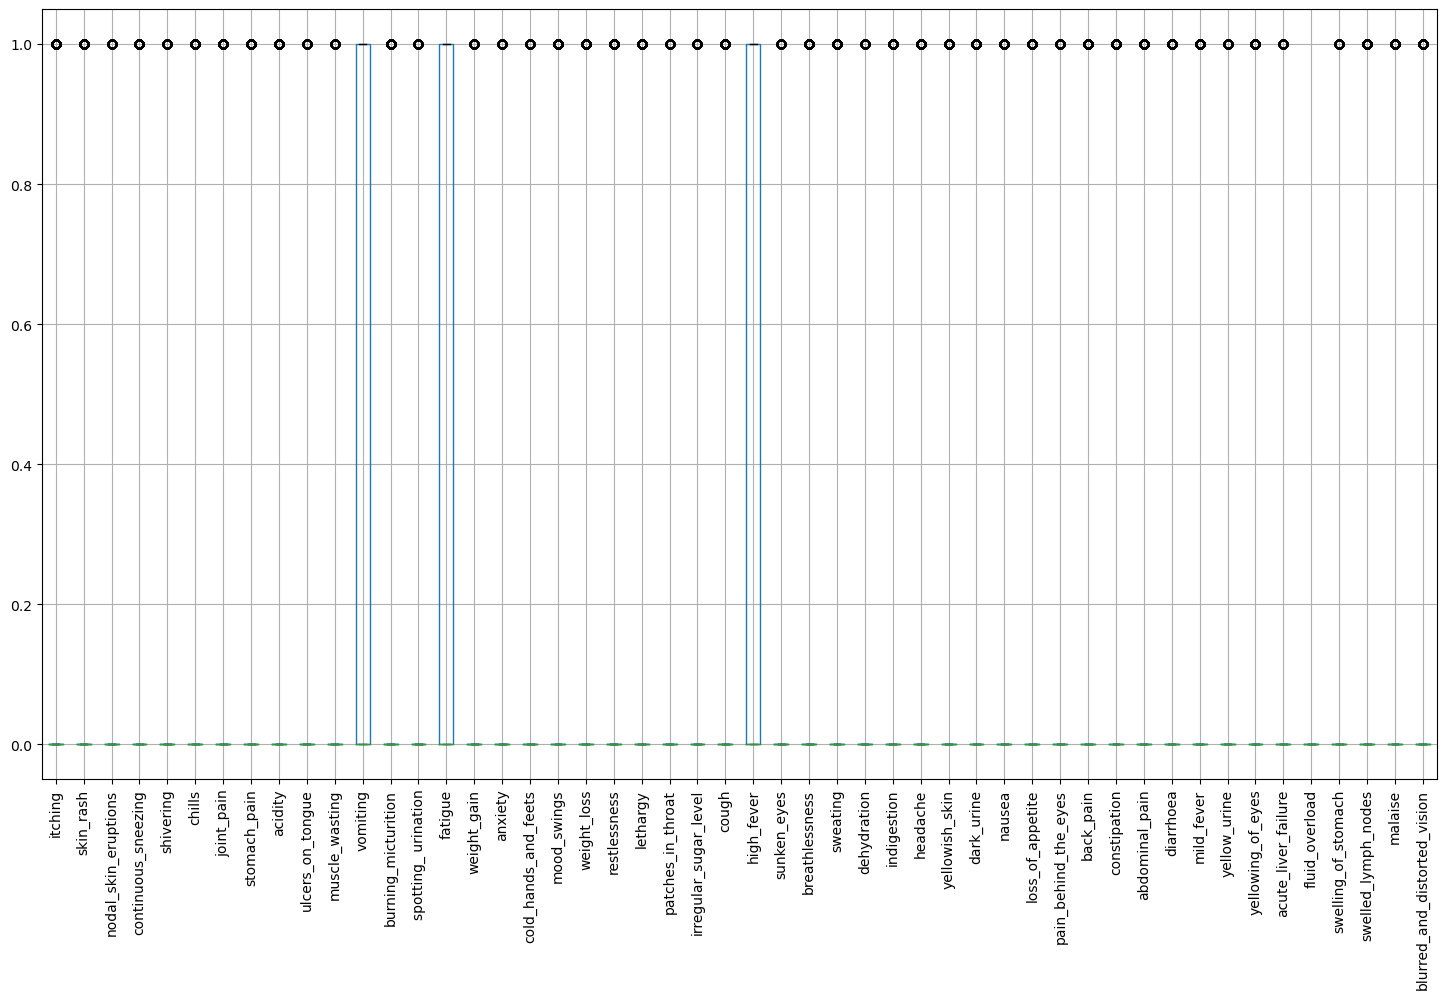

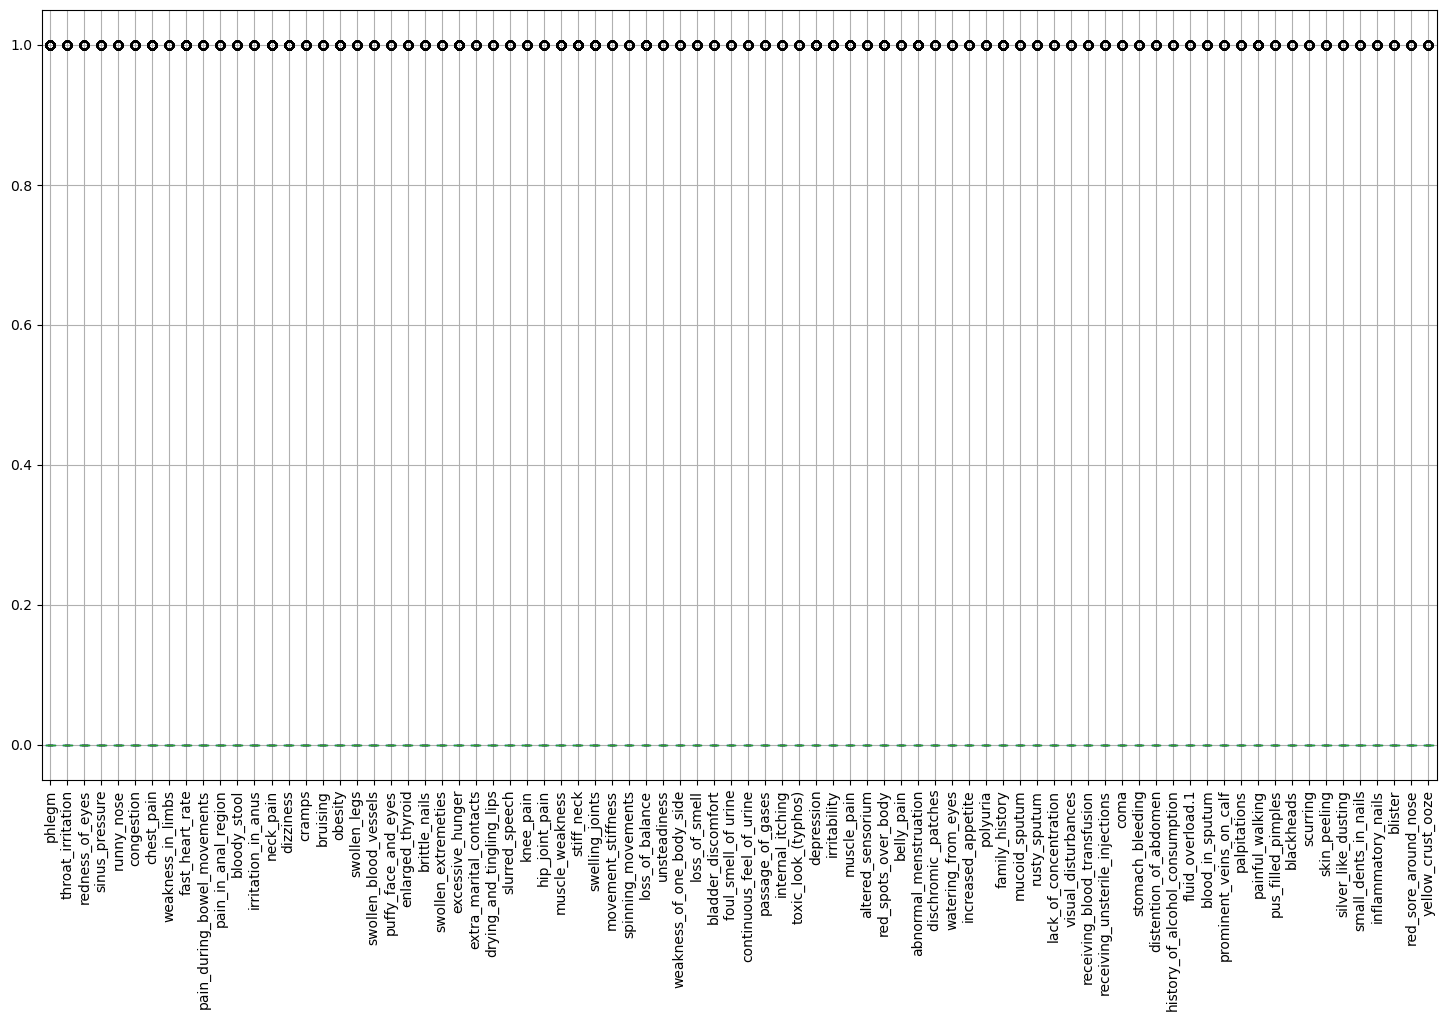

**Summary**:
 No outliers


In [16]:
temp_df=train_set.iloc[:,:-1]
#Detect outliers
plt.subplots(figsize=(18,10))
temp_df.iloc[:,:50].boxplot()
plt.xticks(rotation=90)
plt.show()

plt.subplots(figsize=(18,10))
temp_df.iloc[:,50:].boxplot()
plt.xticks(rotation=90)
plt.show()

print(f'**Summary**:\n No outliers')

### Correlation Matrix

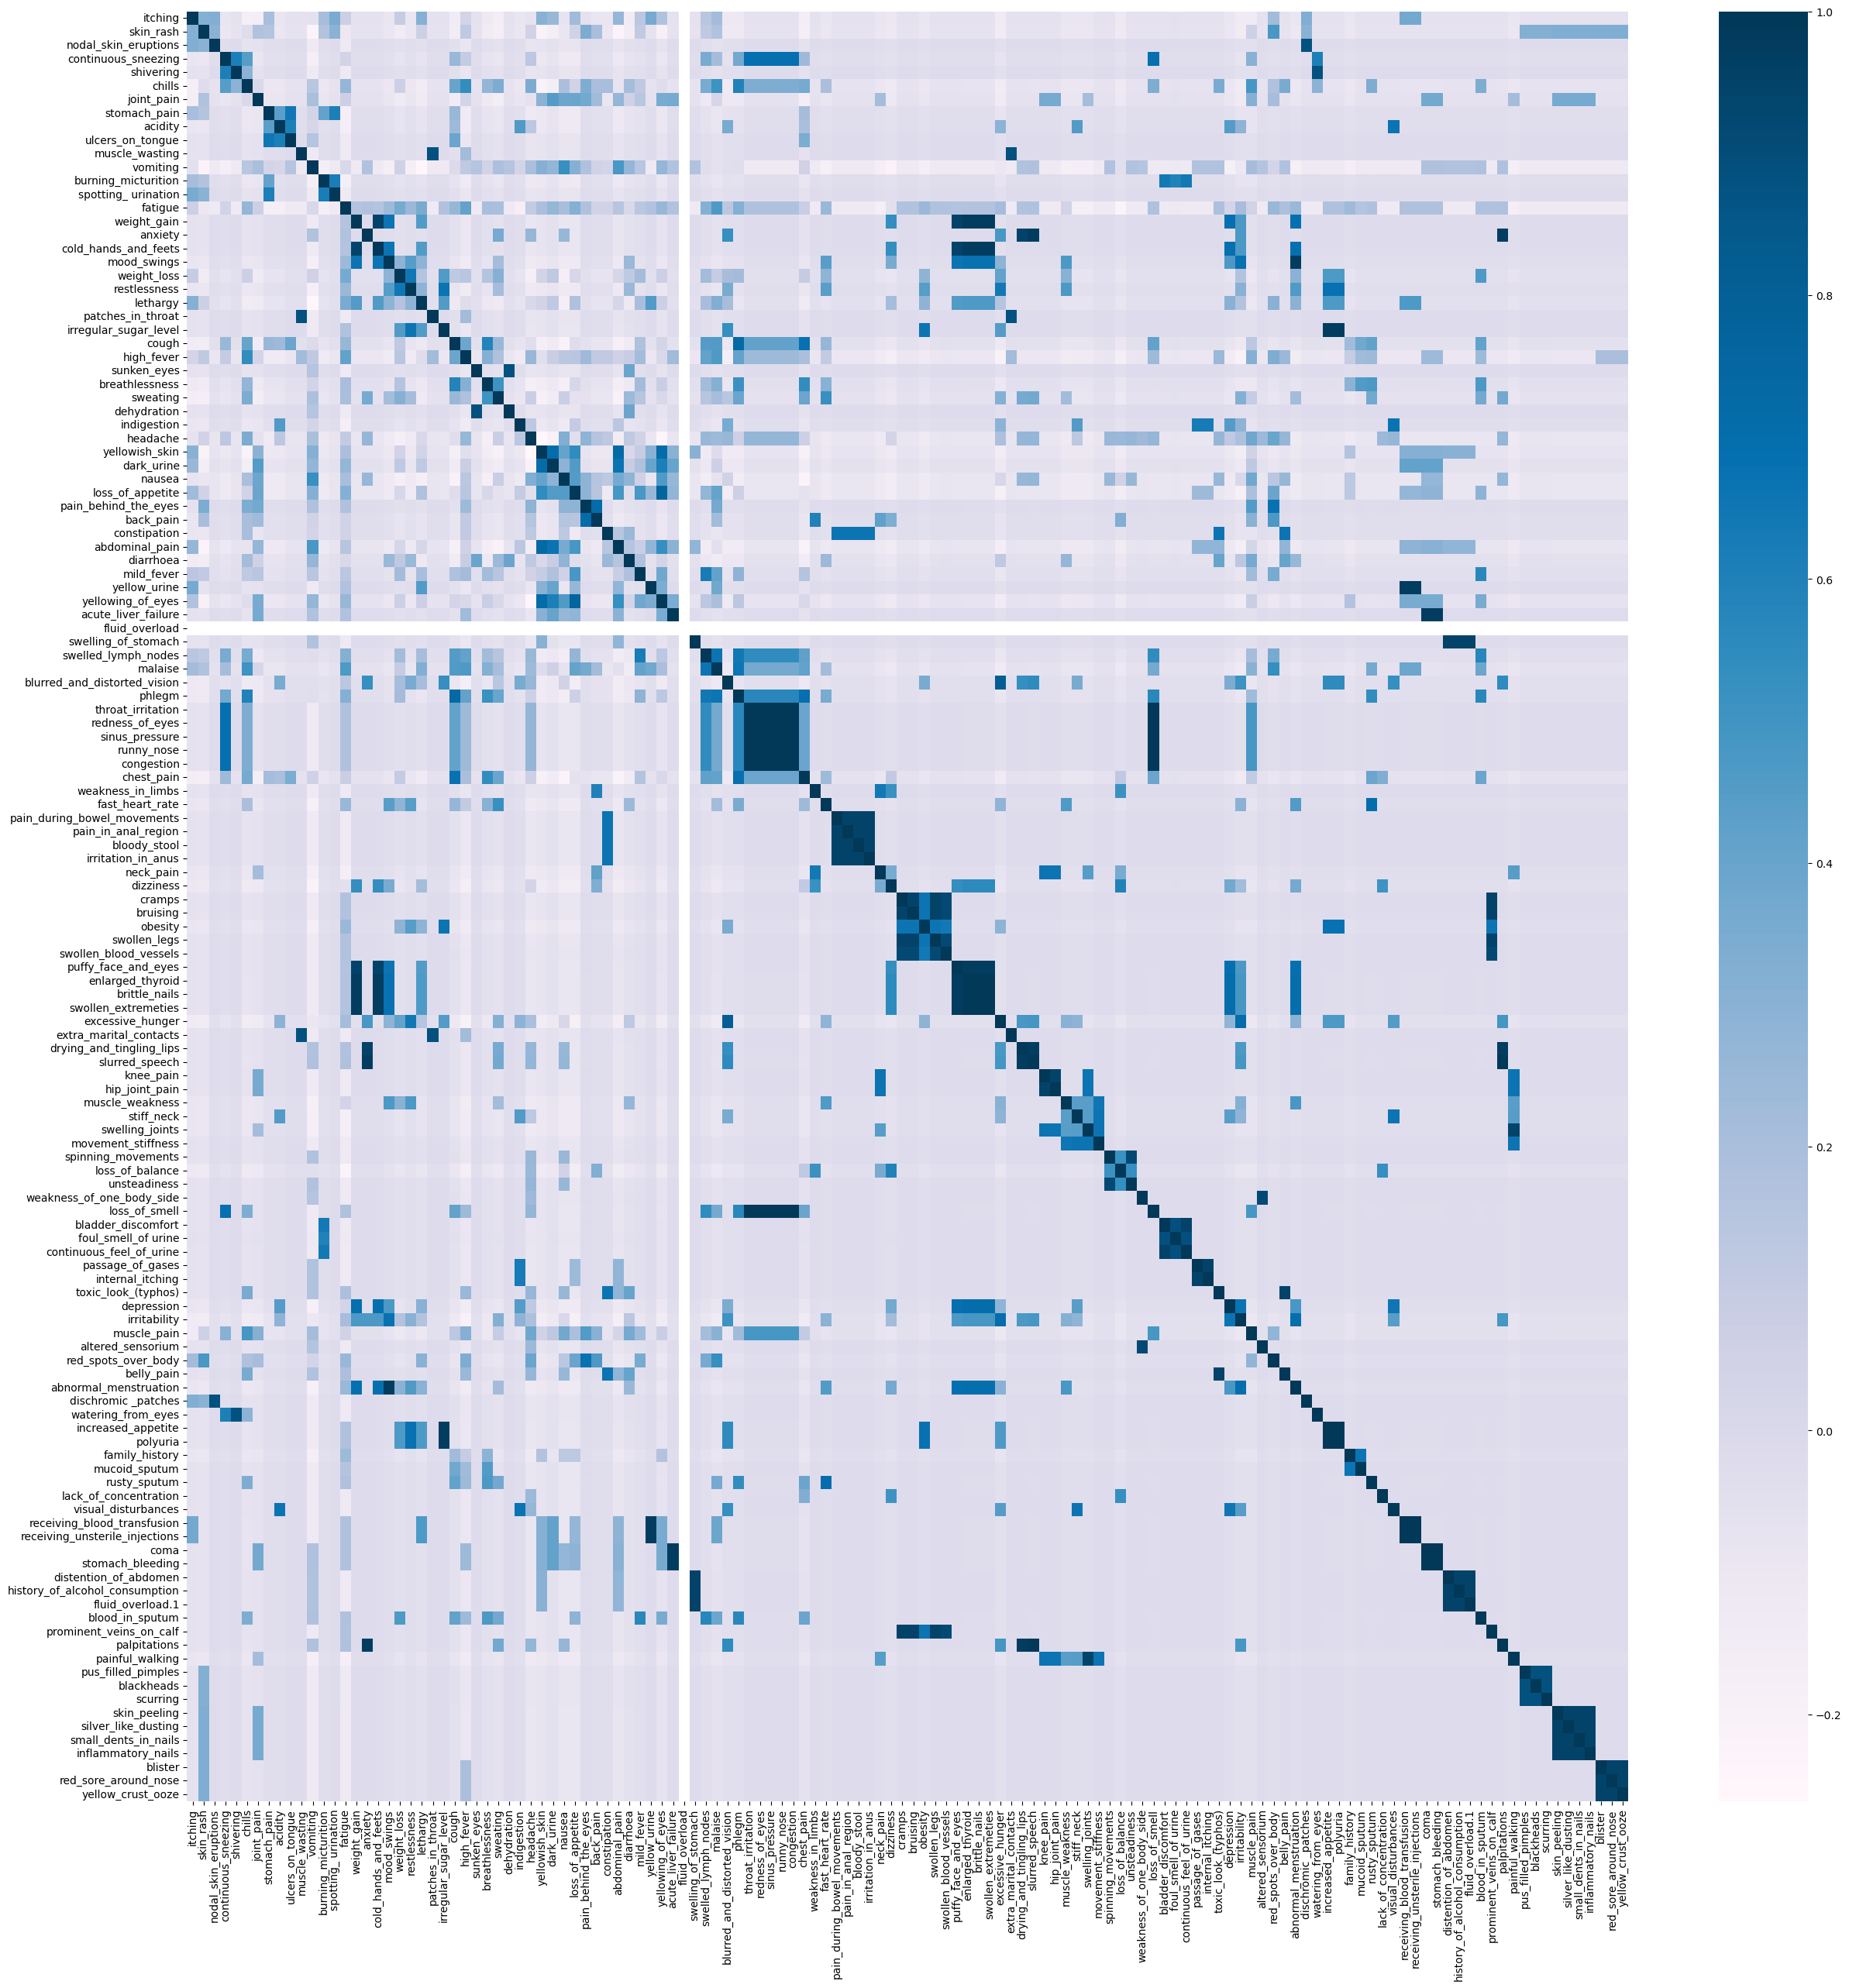

In [17]:
plt.figure(figsize = (30, 30))
sns.heatmap(train_set.corr(), cmap = 'PuBu', annot = False)
plt.show()

#### Dropping feature columns with correlation greater than 0.9

In [18]:
corr_matrix=train_set.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,NaN,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,NaN,NaN,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,NaN,NaN,NaN,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,NaN,NaN,NaN,NaN,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,NaN,NaN,NaN,NaN,NaN,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.023720,-0.023720,-0.023720
blister,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946120,0.946120
red_sore_around_nose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946120


In [19]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop,len(to_drop))

train_set=train_set.drop(to_drop, axis=1)
test_set=test_set.drop(to_drop, axis=1)

['cold_hands_and_feets', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness', 'loss_of_smell', 'continuous_feel_of_urine', 'internal_itching', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'red_sore_around_nose', 'yellow_crust_ooze'] 42


#### Dropping constant feature columns

### Label Encoder

In [21]:
encoder = LabelEncoder()
train_set["prognosis"] = encoder.fit_transform(train_set["prognosis"])
test_set["prognosis"] = encoder.transform(test_set["prognosis"])


### Test Valid Split

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(train_set.drop('prognosis', 1), train_set['prognosis'], test_size = .4, random_state=42,shuffle=True)

In [23]:
X_train.shape

(2952, 90)

In [24]:
test_set = pd.concat([test_set,pd.concat([X_valid,y_valid],axis=1)],axis=0)
test_set.shape

(2010, 91)

## Logistic Regression

In [25]:
lr=LogisticRegression(C=0.2,random_state=42, penalty='l2')
lr.fit(X_train,y_train)
print("Logistic Train score with ",format(lr.score(X_train, y_train)))

Logistic Train score with  1.0


In [26]:
print("Logistic Test score with ",format(lr.score(test_set.iloc[:,:-1], test_set['prognosis'])))

Logistic Test score with  0.9995024875621891


#### Confusion Matrix

Text(0.5, 885.5555555555555, 'Predicted label')

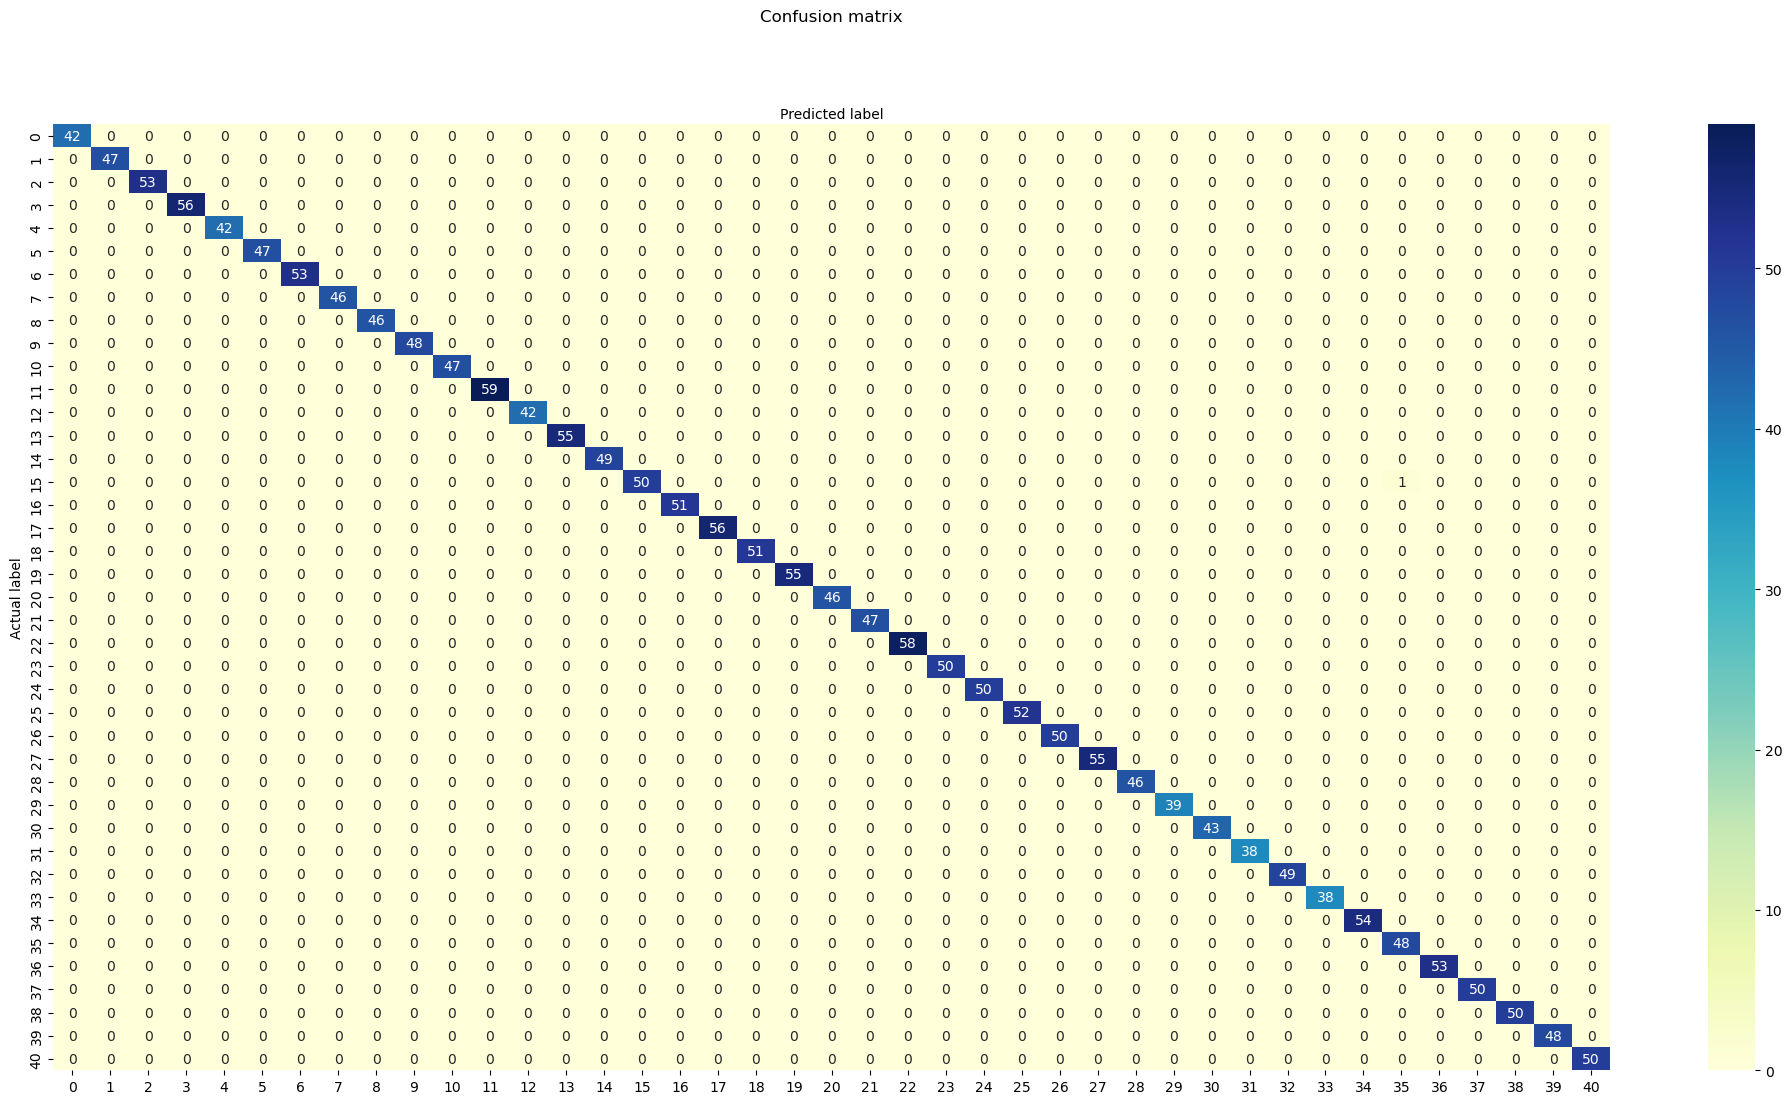

In [27]:
y_pred = lr.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Classification report

In [28]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      1.00      1.00        55
          14       1.00      1.00      1.00        49
          15       1.00      0.98      0.99        51
          16       1.00      1.00      1.00        51
          17       1.00    

### Decision Tree

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision Tree Train score with ",format(dt.score(X_train, y_train)))

Decision Tree Train score with  1.0


In [30]:
print("Decision Tree Test score with ",format(dt.score(test_set.iloc[:,:-1], test_set['prognosis'])))

Decision Tree Test score with  0.9965174129353234


#### Confusion Matrix

Text(0.5, 885.5555555555555, 'Predicted label')

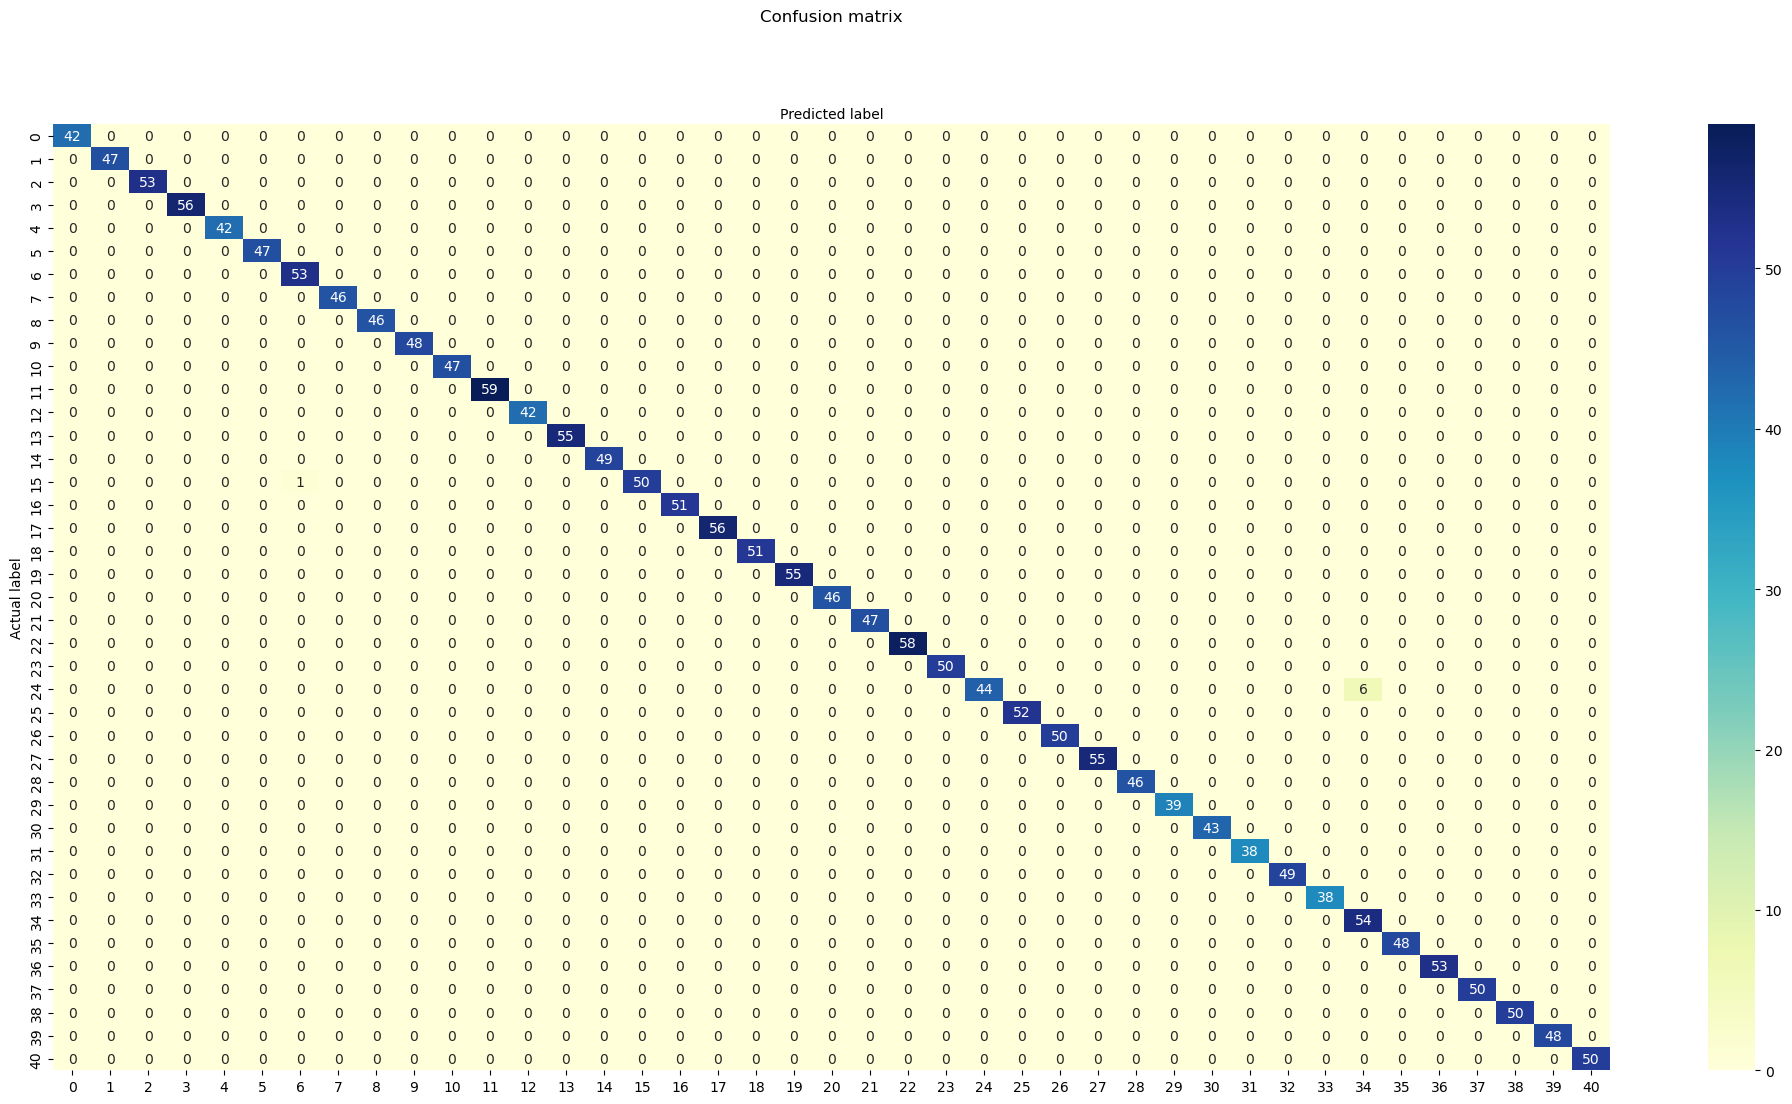

In [31]:
y_pred = dt.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Classification report

In [32]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        47
           6       0.98      1.00      0.99        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      1.00      1.00        55
          14       1.00      1.00      1.00        49
          15       1.00      0.98      0.99        51
          16       1.00      1.00      1.00        51
          17       1.00    

### Random Forest

In [33]:
rf = RandomForestClassifier(max_depth=6,oob_score=True,random_state=42,criterion='entropy',max_features='auto',n_estimators=300)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_valid)
print("Random Forest Train score with ",format(rf.score(X_train, y_train)))

Random Forest Train score with  0.9969512195121951


In [34]:
print("Random Forest Test score with ",format(rf.score(test_set.iloc[:,:-1], test_set['prognosis'])))

Random Forest Test score with  0.9955223880597015


#### Confusion Matrix

Text(0.5, 885.5555555555555, 'Predicted label')

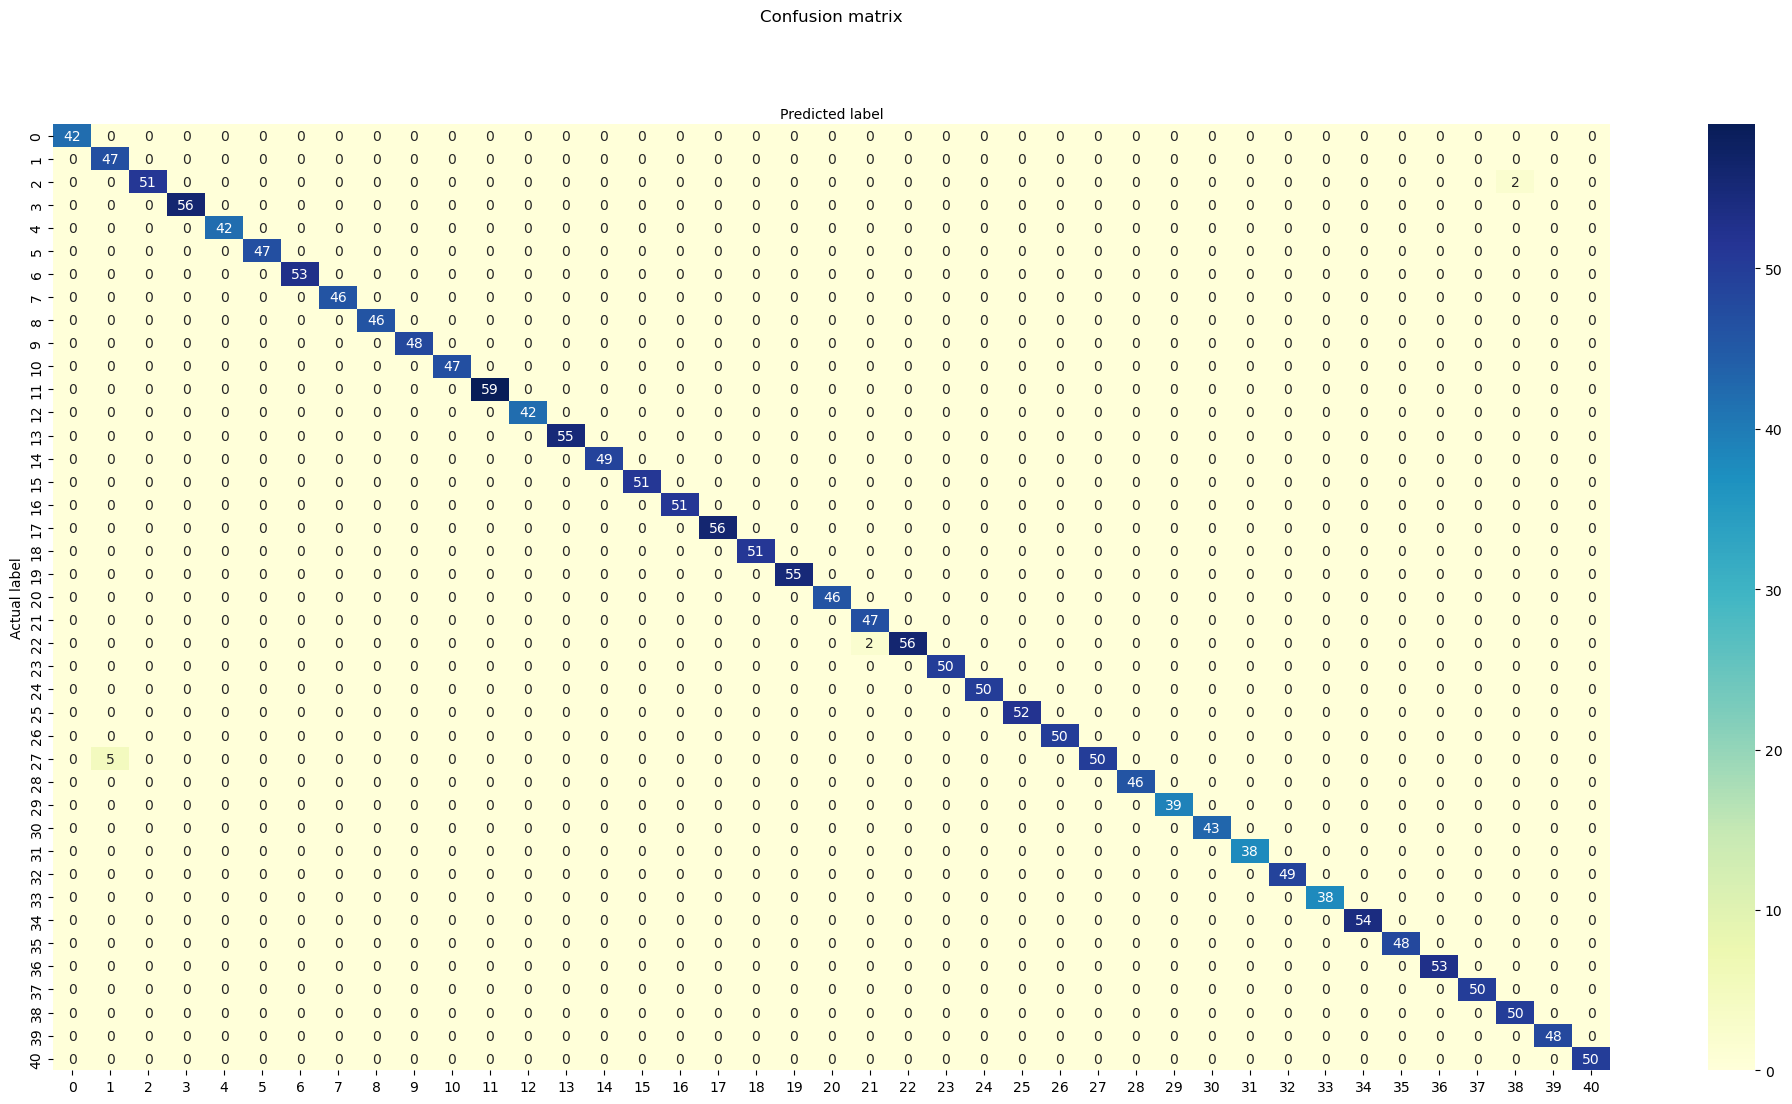

In [35]:
y_pred = rf.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Classification report

In [36]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.90      1.00      0.95        47
           2       1.00      0.96      0.98        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      1.00      1.00        55
          14       1.00      1.00      1.00        49
          15       1.00      1.00      1.00        51
          16       1.00      1.00      1.00        51
          17       1.00    

### SVM

In [37]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred=svm.predict(X_valid)
print("SVM Train score with ",format(svm.score(X_train, y_train)))

SVM Train score with  1.0


In [38]:
print("SVM Test score with ",format(svm.score(test_set.iloc[:,:-1], test_set['prognosis'])))

SVM Test score with  0.9995024875621891


#### Confusion Matrix

Text(0.5, 885.5555555555555, 'Predicted label')

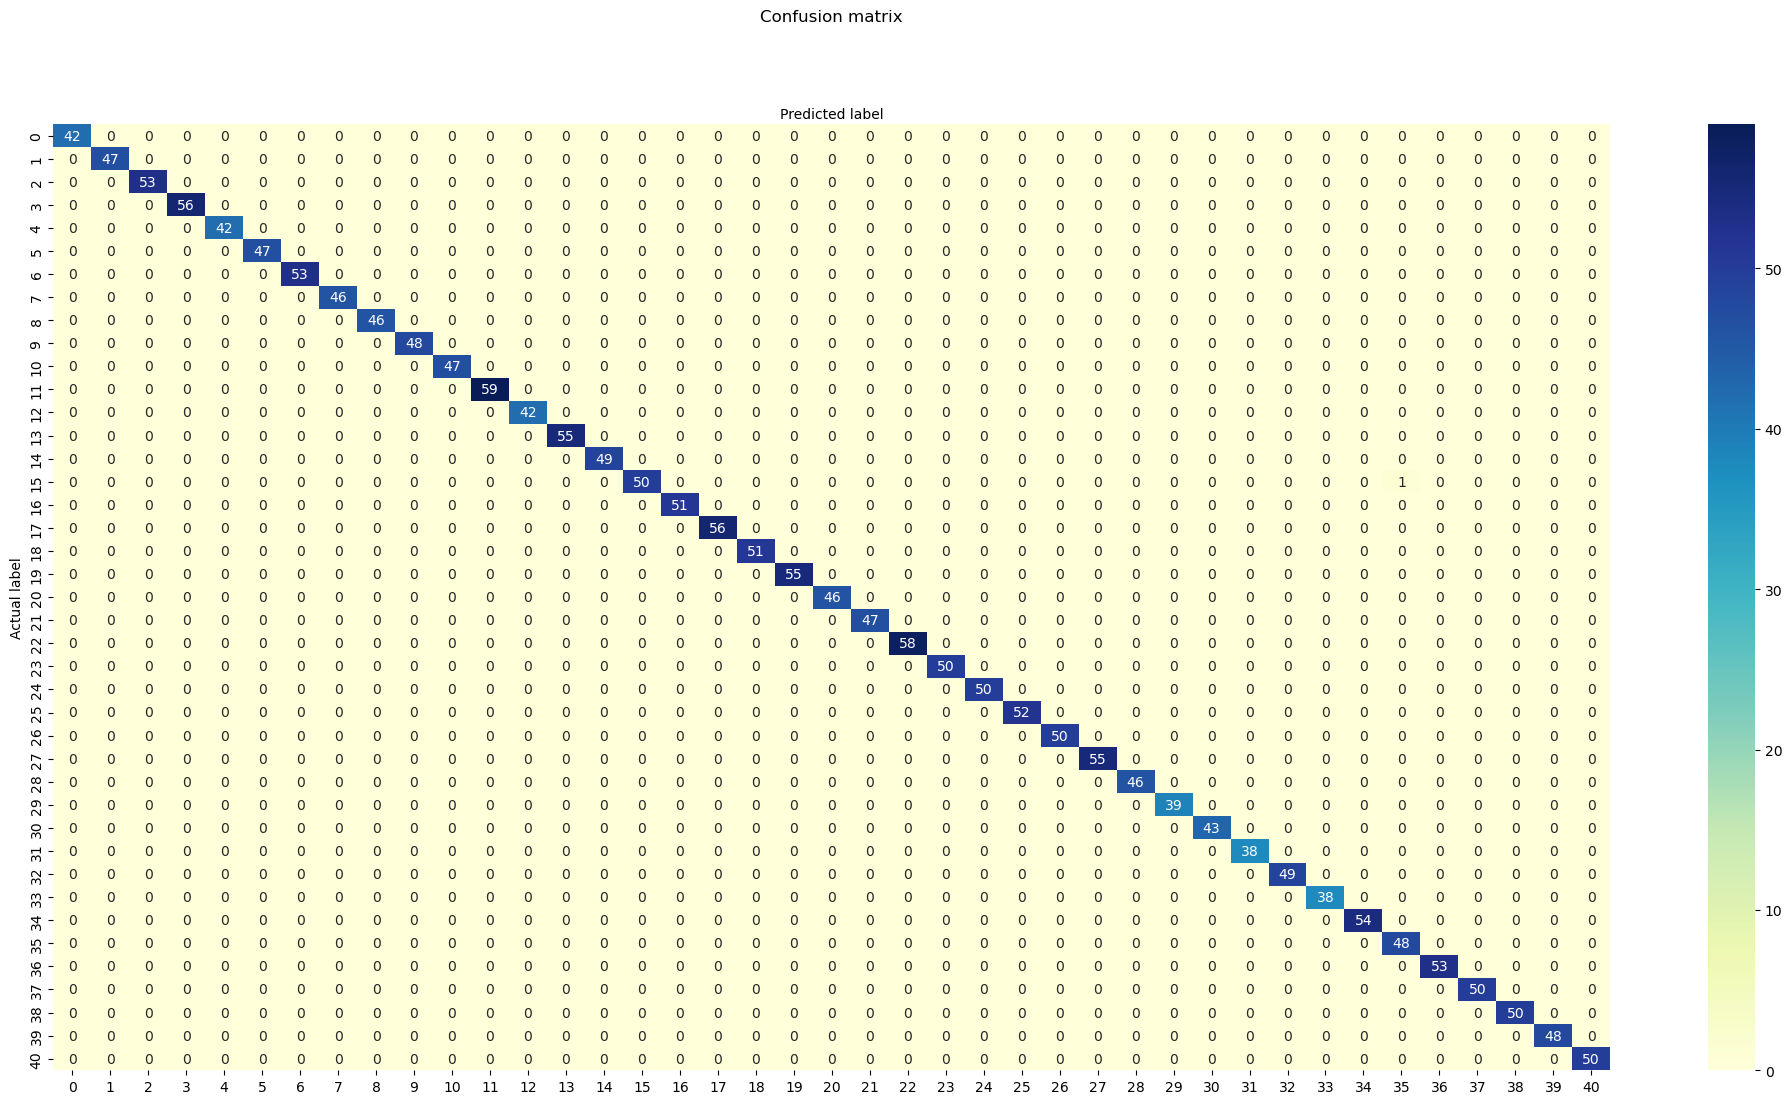

In [39]:
y_pred = svm.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Classification report

In [40]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      1.00      1.00        55
          14       1.00      1.00      1.00        49
          15       1.00      0.98      0.99        51
          16       1.00      1.00      1.00        51
          17       1.00    

### Naive Bayes

In [41]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred=bayes.predict(X_valid)
print("Naive Bayes Train score with ",format(bayes.score(X_train, y_train)))

Naive Bayes Train score with  1.0


In [42]:
print("Naive Bayes Test score with ",format(bayes.score(test_set.iloc[:,:-1], test_set['prognosis'])),'%')

Naive Bayes Test score with  0.9995024875621891 %


#### Confusion Matrix

Text(0.5, 885.5555555555555, 'Predicted label')

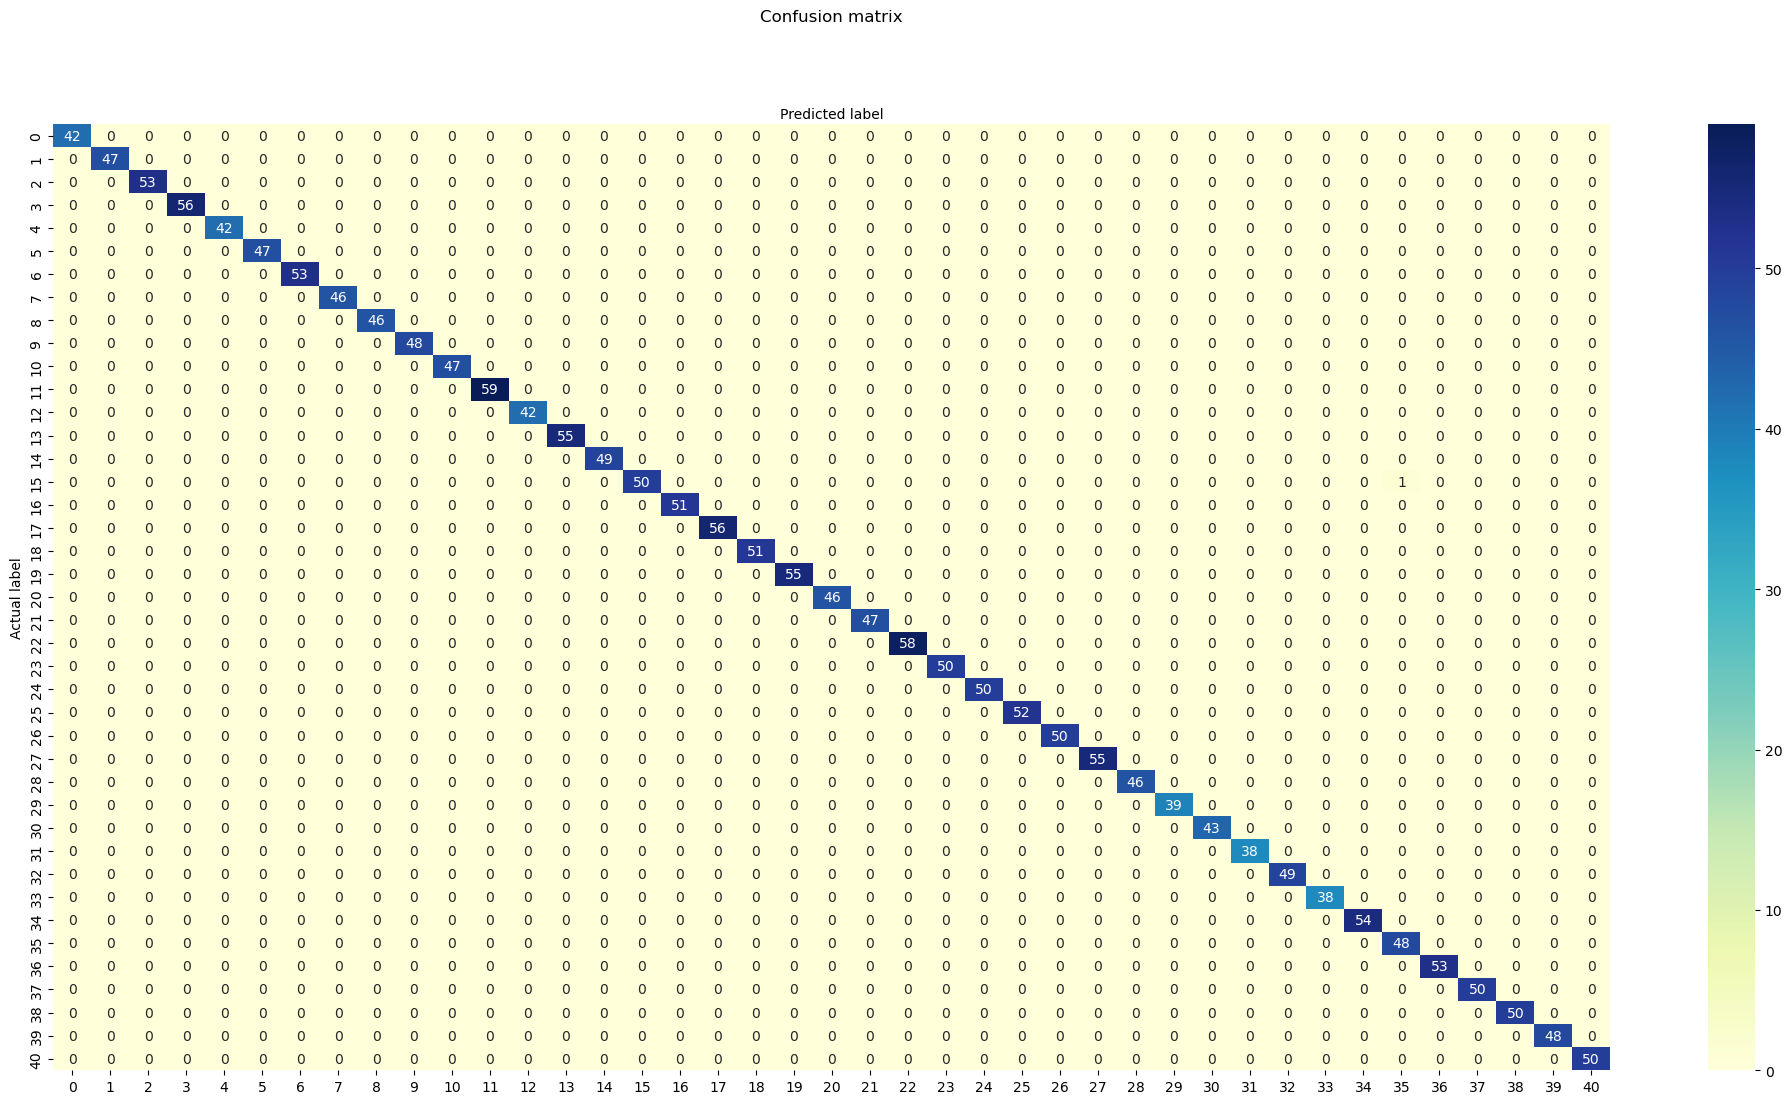

In [43]:
y_pred = bayes.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Classification report

In [44]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      1.00      1.00        55
          14       1.00      1.00      1.00        49
          15       1.00      0.98      0.99        51
          16       1.00      1.00      1.00        51
          17       1.00    

#### Classification report

## Model Accuracy Comparision

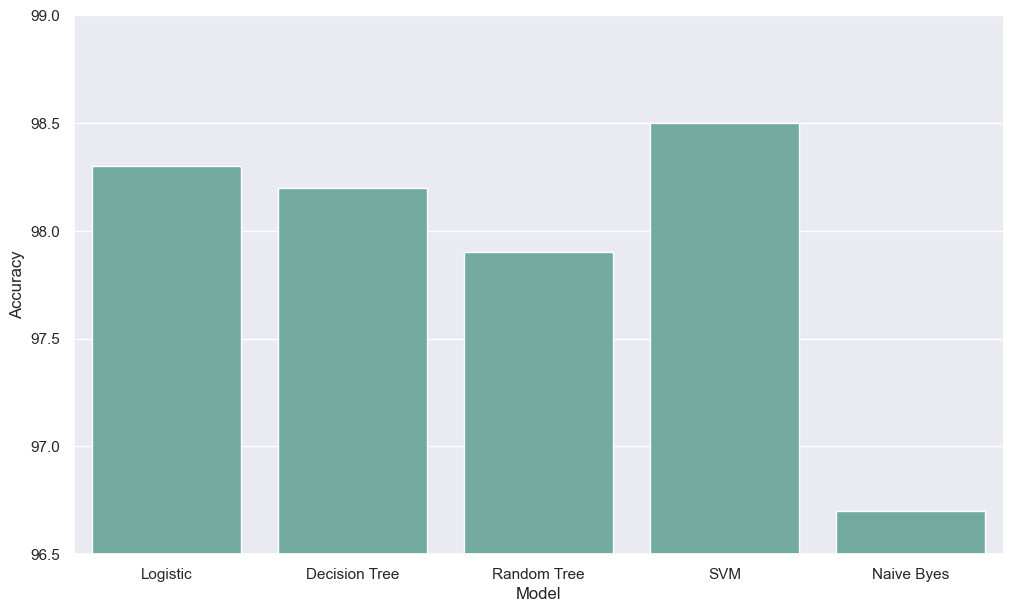

In [45]:
sns.set(style="darkgrid")

acc = pd.DataFrame({'Model':['Logistic','Decision Tree','Random Tree','SVM','Naive Byes'],'Accuracy':[98.3,98.2,97.9,98.5,96.7]})

# Set the figure size
fig, ax =  plt.subplots(figsize=(12, 7))
ax.set_ylim(96.5, 99)
# plot a bar chart
sns.barplot(
    x="Model", 
    y="Accuracy", 
    data=acc,  
    ci=None, 
    color='#69b3a2',
    orient = 'v');
plt.show()

In [46]:
import joblib as joblib

In [48]:
joblib.dump(y_pred,'trained_model')

['trained_model']

In [49]:
predi= joblib.load('trained_model')